In [136]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE , SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, metrics

import os

In [138]:
# Find NaN values using isna() or isnull()
def print_missing_values(df):
    missing_values = df.isna().sum()
    # Filter columns with missing values and print their names and counts
    columns_with_missing_values = missing_values[missing_values > 0]
    print("\nColumns with Missing Values:")
    for column_name, missing_count in columns_with_missing_values.items():
        print(f"{column_name}: {missing_count} missing values")




In [139]:
#function to plot box plot for categoricalvariable within a dataset with dimensions also as input
def do_box_plot(df,x,y,figsize_x,figsize_y):
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.subplot(2,3,1)
    sns.boxplot(x = x, y = y, data = df)


In [140]:
#function to replace na,'','NA' with 0 for array of numeric input columns in the input df
def replace_na_with_zero(df, column_names):
    # Iterate through the specified column names
    for column_name in column_names:
            # Replace "NA" strings with 0 in the selected column
            df[column_name].fillna(0)
            df[column_name] = df[column_name].replace("NA", 0)
            df[column_name] = df[column_name].replace("", 0)
            df[column_name] = df[column_name].replace(" ", 0)
            
    return df

In [141]:
#create dummy columns and drop the original column for input list of categorical vriables and df
def create_dummy_columns(df, column_names):
    # Iterate through the specified column names
    for column_name in column_names:
        if column_name in df.columns:
            # Replace "NA" strings with 0 in the selected column
            dummy_df = pd.get_dummies(df[column_name], prefix=column_name)
            dummy_df.drop(dummy_df.columns[-1], axis=1, inplace=True)
            df = pd.concat([df, dummy_df], axis=1)
            df.drop(column_name, axis=1, inplace=True)

    return df

In [142]:
#Identified numeric columns where null value to be replaced by 0
list_of_numeric_columns=[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'SalePrice'                                   
]

In [143]:
#Columns needing dummy variables
columns_needing_dummy_variables=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                                'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                                'Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath',
                                'HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                                'FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
                                'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [144]:
#columns identified for min max scaling for  scaling continuous variables
scaled_columns=['LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'GarageYrBlt',
'YearBuilt',
'YearRemodAdd',
'YrSold'
]

In [145]:

#read csv
df_homeprice = pd.read_csv("train.csv")

In [146]:
#replace all numeric columns null values with 0
df_homeprice_withoutna=replace_na_with_zero(df_homeprice,list_of_numeric_columns)

In [147]:
#replace year value of GarageYrBlt with 1800
df_homeprice_withoutna['GarageYrBlt'] = df_homeprice_withoutna['GarageYrBlt'].replace("NA", 1800)

In [148]:
#print missing values
print_missing_values(df_homeprice_withoutna)


Columns with Missing Values:
Alley: 1369 missing values
MasVnrType: 8 missing values
BsmtQual: 37 missing values
BsmtCond: 37 missing values
BsmtExposure: 38 missing values
BsmtFinType1: 37 missing values
BsmtFinType2: 38 missing values
Electrical: 1 missing values
FireplaceQu: 690 missing values
GarageType: 81 missing values
GarageFinish: 81 missing values
GarageQual: 81 missing values
GarageCond: 81 missing values
PoolQC: 1453 missing values
Fence: 1179 missing values
MiscFeature: 1406 missing values


In [149]:
#Initialise minmax scaler
scaler = MinMaxScaler()

In [150]:
#create dummy variables
df_homeprice_withoutna_dummy=create_dummy_columns(df_homeprice_withoutna,columns_needing_dummy_variables)

In [151]:
#print missing values in df
print_missing_values(df_homeprice_withoutna_dummy)


Columns with Missing Values:


In [152]:
# Doing train_test_split with seed, we specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(df_homeprice_withoutna_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)


In [153]:
#scaling of columns using minmax scaler
scaler.fit(df_train[scaled_columns])
df_train[scaled_columns] = scaler.transform(df_train[scaled_columns])
df_test[scaled_columns] = scaler.transform(df_test[scaled_columns])

In [154]:
#get X and y dataset to train the model pop the y column from df train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [155]:
#get X and y dataset to test the model pop the y column from df test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [156]:
#check transformation
df_test.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
1436,1437,0.19,0.04,0.72,0.35,0.00,0.11,0.00,0.11,0.14,...,0,0,0,0,0,0,0,0,0,1
57,58,0.28,0.05,0.96,0.90,0.00,0.00,0.00,0.37,0.14,...,0,0,0,0,0,0,0,0,0,1
780,781,0.20,0.03,0.89,0.77,0.02,0.00,0.00,0.53,0.20,...,0,0,0,0,0,0,0,0,0,1
382,383,0.25,0.04,0.97,0.93,0.00,0.00,0.00,0.40,0.15,...,0,0,0,0,0,0,0,0,0,1
1170,1171,0.24,0.04,0.76,0.45,0.00,0.09,0.00,0.25,0.18,...,0,0,0,0,0,0,0,0,0,1


In [157]:
#Train and print model summary
#Show error term distribution
#return model for selected_coulumns
def train_print_summary(column_list,X_train,y_train):
    X_train_lm = X_train[column_list]
    X_train_lm = sm.add_constant(X_train_lm)    
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    y_train_cnt = lr.predict(X_train_lm)
    fig = plt.figure()
    sns.distplot((y_train - y_train_cnt), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)
    return lr
  

In [158]:
# Check for the VIF values of the feature variables.   
def vif_print_summary(column_list,X_train):
    X_train_vif=X_train[column_list]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [159]:
# Check for the VIF values of the feature variables.   
def vif_print_summary(column_list,X_train):
    X_train_vif=X_train[column_list]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [160]:
#Get k best feature for model 
def select_k_best_with_lr(X_train, y_train, n_features_to_select):
    model = LinearRegression()
    selector = SelectKBest(score_func=f_regression, k=n_features_to_select)
    X_train_selected = selector.fit_transform(X_train, y_train)
    model.fit(X_train_selected, y_train)
    return model, selector.get_support()

In [161]:
#rfe method to get best model with number features not suggested
def rfe_with_lr(X_train, y_train):
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    return model, rfe.support_


In [162]:
#rfe method to get best model with number features suggested
def rfe_with_lr_x(X_train, y_train, n_features_to_select):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_rfe, y_train)
    return model, rfe.support_

In [163]:
# Find NaN values using isna() or isnull()
missing_values = X_train.isna().sum()


In [164]:
# Filter columns with missing values and print their names and counts
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
for column_name, missing_count in columns_with_missing_values.items():
    print(f"{column_name}: {missing_count} missing values")



Columns with Missing Values:


Selected features:
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
MSSubClass_60
MSZoning_RL
Neighborhood_NoRidge
Neighborhood_NridgHt
OverallQual_4
OverallQual_5
OverallQual_8
OverallQual_9
OverallCond_5
Exterior1st_VinylSd
Exterior2nd_VinylSd
MasVnrType_None
ExterQual_Ex
ExterQual_Gd
Foundation_CBlock
Foundation_PConc
BsmtQual_Ex
BsmtExposure_Gd
BsmtFinType1_GLQ
HeatingQC_Ex
CentralAir_N
FullBath_1
FullBath_2
HalfBath_0
HalfBath_1
KitchenQual_Ex
KitchenQual_Gd
TotRmsAbvGrd_10
Fireplaces_0
Fireplaces_1
FireplaceQu_Ex
FireplaceQu_Gd
GarageType_Attchd
GarageFinish_Fin
GarageCars_1
GarageCars_3
SaleType_New
                Features    VIF
8              GrLivArea 682.50
6               1stFlrSF 396.51
7               2ndFlrSF 150.50
9            GarageYrBlt  61.60
1              YearBuilt  61.41
36            HalfBath_0  49.21
10            GarageArea  36.68
22   Exterior1st_VinylSd  32.16
37      

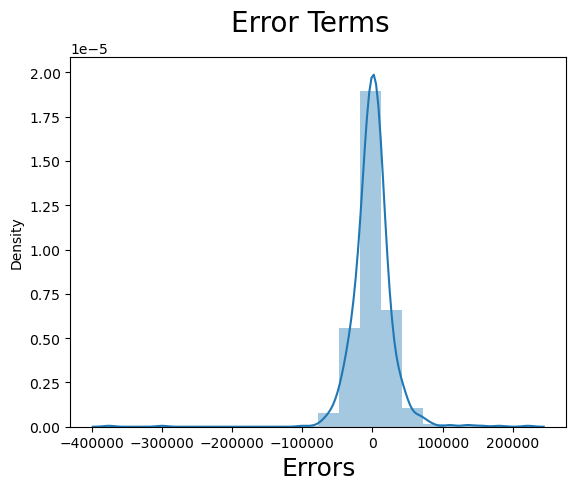

In [165]:
# Assuming you have X_train and y_train dataframes
n_features_to_select = 50  # Specify the number of features to select
selected_model, selected_features_mask = select_k_best_with_lr(X_train, y_train, n_features_to_select)
selected_features = X_train.columns[selected_features_mask]
print("Selected features:")
for feature in selected_features:
    print(feature)
vif_print_summary(selected_features,X_train)

print('R2 and Error Terms on Training Data')
lr=train_print_summary(selected_features,X_train,y_train)

# important variables in model are 1 yr,2 temp ,3 windspeed.
# yr/seasonweathersit might have some overlap this might be causing increase in 

In [166]:
# Instantiate
#lm = LinearRegression()

# Fit a line
#lm.fit(X_train, y_train)




lm,selected_features_mask=rfe_with_lr(X_train, y_train)

selected_features = X_train.columns[selected_features_mask]

print(selected_features)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'PoolQC_Fa', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=151)


In [167]:
# Print the coefficients and intercept
#print(lm.intercept_)
#print(lm.coef_)

In [168]:
from sklearn.metrics import r2_score, mean_squared_error

r2_train_lr 0.9621485147023381
r2_test_lr -3.5461695887906686
rss1_lr 241518926797.21518
rss2_lr 12814345185021.818
mse_train_lr 236551348.47915298
mse_test_lr 29256495856.2142


Text(0.5, 0, 'Errors')

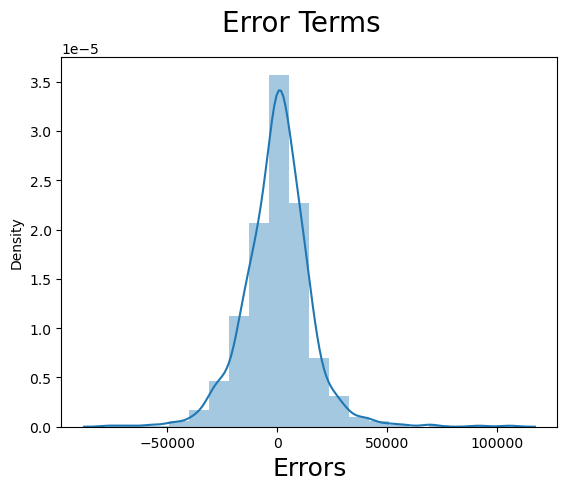

In [169]:
# calculate some metrics such as R2 score, RSS and RMSE LinearRegression

#lm=LinearRegression();
#x_features=['YearBuilt','YearRemodAdd','BsmtFinType1_GLQ','TotalBsmtSF','BsmtQual_Ex','GarageYrBlt','HouseStyle_1Story']
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric.append(r2_test_lr)


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric.append(mse_test_lr**0.5)




fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)



In [170]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [171]:
#Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_ev

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [172]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [173]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha =model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=0.1)

In [174]:
#Ridge optimal alpha/lambda value is 0.1

r2_train_lr 0.9580933277459313
r2_test_lr 0.8319508299057662
rss1_lr 267393853341.61545
rss2_lr 473682301459.589
mse_train_lr 261894077.7097115
mse_test_lr 1081466441.6885593


Text(0.5, 0, 'Errors')

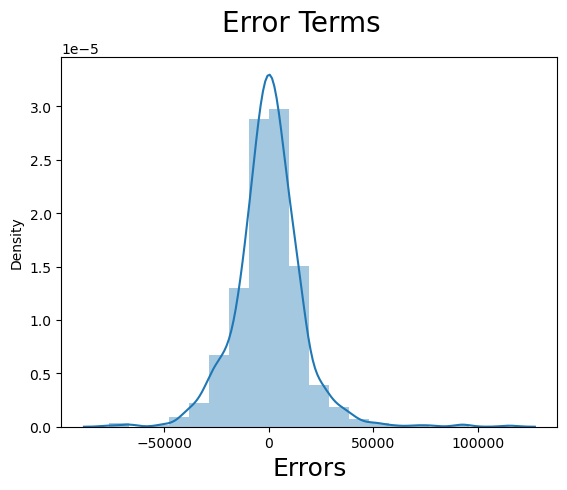

In [175]:
# calculate some metrics such as R2 score, RSS and RMSE ridge
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric2.append(mse_test_lr**0.5)


fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [176]:
# Get the coefficients (parameters) and their magnitudes
coef_magnitudes = abs(ridge.coef_)

# Get the column (feature) names from X
feature_names = X_train.columns

In [177]:
# Sort and print the feature names by coefficient magnitude
# Sort the feature names and coefficients by coefficient magnitude in descending order
sorted_indices = coef_magnitudes.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = [ridge.coef_[i] for i in sorted_indices]

# Print the sorted feature names and their corresponding coefficients
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}, : {round(coef,2)}")

RoofMatl_ClyTile, : -496685.85
Condition2_PosN, : -350430.27
PoolQC_Ex, : 175356.97
GrLivArea, : 138015.01
1stFlrSF, : 133920.78
LotArea, : 112235.08
PoolQC_Fa, : 105941.22
PoolArea, : -90202.3
OverallQual_4, : -77024.84
OverallQual_5, : -76332.52
OverallQual_3, : -76282.97
OverallQual_6, : -75834.25
BsmtFinSF1, : 74641.82
TotalBsmtSF, : 74312.08
2ndFlrSF, : 73214.09
OverallQual_7, : -68273.86
Functional_Sev, : -60322.42
OverallQual_2, : -55509.22
OverallQual_8, : -52458.68
YearBuilt, : 49112.07
OverallCond_3, : -44439.52
RoofMatl_Tar&Grv, : -39265.12
MSZoning_C (all), : -38950.69
OverallCond_1, : -38060.79
BsmtCond_Po, : -38060.79
OverallQual_1, : -38060.79
MSSubClass_75, : -37898.18
RoofMatl_CompShg, : -37249.55
OverallCond_4, : -36915.68
TotRmsAbvGrd_11, : -34781.95
FullBath_0, : -33510.92
HouseStyle_2.5Unf, : 33366.87
OverallCond_5, : -32322.09
RoofStyle_Hip, : -30280.5
FullBath_2, : -30147.3
Heating_OthW, : -29130.88
RoofMatl_Roll, : -27908.5
Functional_Mod, : -27244.18
RoofStyle_

In [178]:
#Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [179]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [180]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [181]:
#Lasso optimal alpha/lambda value is 50

r2_train_lr 0.9455044543804866
r2_test_lr 0.849598748100812
rss1_lr 347719662511.27716
rss2_lr 423937893308.61584
mse_train_lr 340567739.9718679
mse_test_lr 967894733.5813147


Text(0.5, 0, 'Errors')

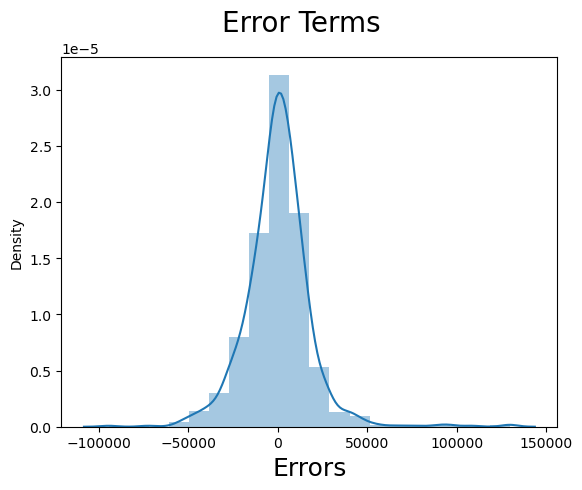

In [182]:
# Lets calculate some metrics such as R2 score, RSS and RMSE lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr',r2_train_lr)
metric3.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr',mse_test_lr)
metric3.append(mse_test_lr**0.5)


fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [183]:
# Get the coefficients (parameters) and their magnitudes
coef_magnitudes = abs(lasso.coef_)

# Get the column (feature) names from X
feature_names = X_train.columns

In [184]:
# Sort and print the feature names by coefficient magnitude
# Sort the feature names and coefficients by coefficient magnitude in descending order
sorted_indices = coef_magnitudes.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_coefficients = [lasso.coef_[i] for i in sorted_indices]

# Print the sorted feature names and their corresponding coefficients
for feature, coef in zip(sorted_features, sorted_coefficients):
    print(f"{feature}, : {round(coef,2)}")

RoofMatl_ClyTile, : -488801.54
Condition2_PosN, : -325484.67
GrLivArea, : 300117.41
TotalBsmtSF, : 77046.19
PoolQC_Ex, : 72248.42
LotArea, : 63931.83
BsmtFinSF1, : 53968.04
FullBath_0, : -37796.31
OverallQual_5, : -33830.51
YearBuilt, : 32992.79
OverallQual_6, : -32939.57
OverallQual_4, : -32156.92
FullBath_2, : -30780.72
FullBath_1, : -28326.9
LowQualFinSF, : -27627.17
OverallQual_3, : -27108.41
Neighborhood_NoRidge, : 25802.06
OverallQual_7, : -25213.37
MasVnrArea, : 24328.48
BsmtQual_Ex, : 23144.34
Neighborhood_Crawfor, : 22910.54
MSZoning_C (all), : -22723.84
KitchenQual_Ex, : 22456.88
TotRmsAbvGrd_11, : -22309.86
OverallCond_3, : -21465.31
BsmtExposure_Gd, : 21309.08
RoofMatl_Tar&Grv, : -19265.31
Functional_Maj1, : -18576.52
ExterQual_Ex, : 17817.11
Exterior1st_BrkFace, : 16983.96
GarageCars_3, : 15503.7
BedroomAbvGr_5, : -14620.89
Neighborhood_StoneBr, : 13948.33
GarageArea, : 13520.68
TotRmsAbvGrd_10, : 13475.6
OverallCond_4, : -13219.29
OverallQual_8, : -13157.86
Neighborhood_S

In [185]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
pd.options.display.float_format = '{:.2f}'.format
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.96,0.96,0.95
1,R2 Score (Test),-3.55,0.83,0.85
2,RSS (Train),241518926797.22,267393853341.62,347719662511.28
3,RSS (Test),12814345185021.82,473682301459.59,423937893308.62
4,MSE (Train),15380.23,16183.14,18454.48
5,MSE (Test),171045.30,32885.66,31111.01


In [186]:
# Lasso and Ridge are able to describe approximately 85% of data

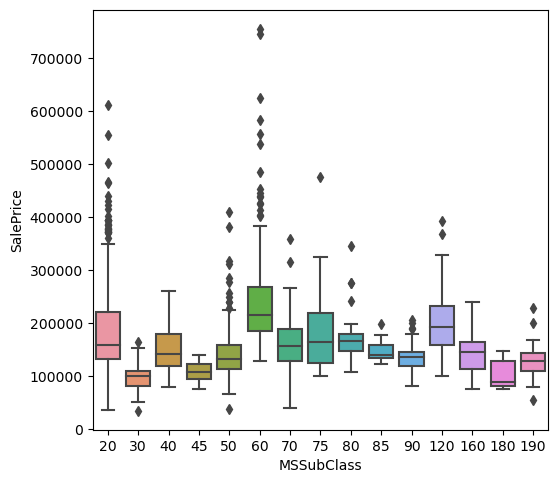

In [187]:
#MSSubClass has significant impact
do_box_plot(df_homeprice,'MSSubClass','SalePrice',20,12)

In [188]:
#Univariate analysis of all the variable.

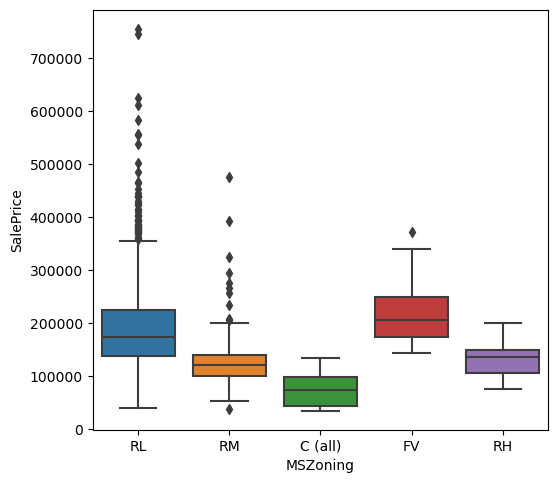

In [189]:
#MSZoning has significant impact
do_box_plot(df_homeprice,'MSZoning','SalePrice',20,12)

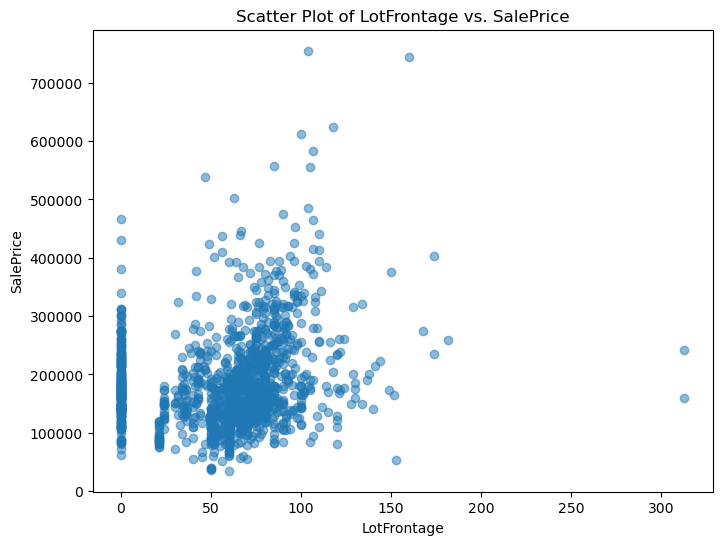

In [190]:
#Lotfrontage has significant impact
# Extract the data for the scatter plot
x = df_homeprice['LotFrontage']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of LotFrontage vs. SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

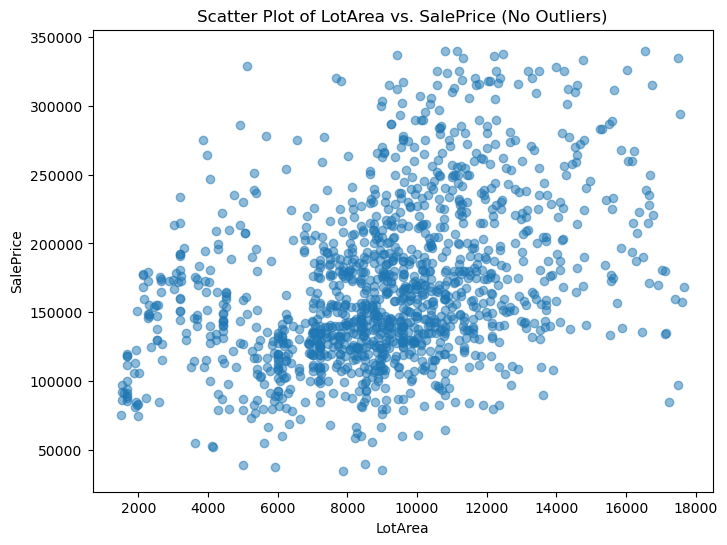

In [191]:
# SalePrice has significant impact
x = df_homeprice['LotArea']
y = df_homeprice['SalePrice']

# Calculate the IQR (Interquartile Range) for both x and y
Q1_x = x.quantile(0.25)
Q3_x = x.quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = y.quantile(0.25)
Q3_y = y.quantile(0.75)
IQR_y = Q3_y - Q1_y

# Define the lower and upper bounds for outliers
lower_bound_x = Q1_x - 1.5 * IQR_x
upper_bound_x = Q3_x + 1.5 * IQR_x

lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Filter out outliers using .loc
df_filtered = df_homeprice.loc[(x >= lower_bound_x) & (x <= upper_bound_x) & (y >= lower_bound_y) & (y <= upper_bound_y)]

# Extract the filtered data for the scatter plot
x_no_outliers = df_filtered['LotArea']
y_no_outliers = df_filtered['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_no_outliers, y_no_outliers, alpha=0.5)
plt.title('Scatter Plot of LotArea vs. SalePrice (No Outliers)')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

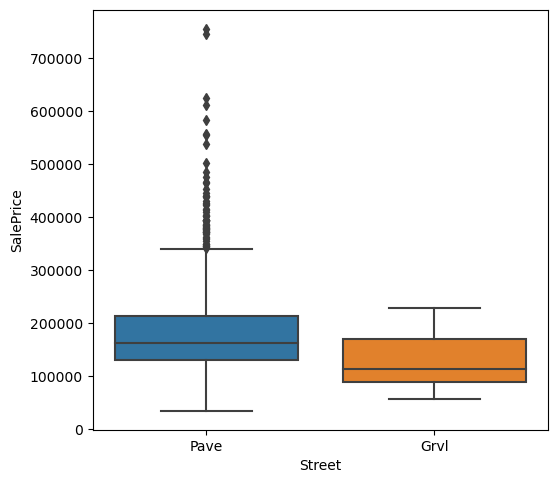

In [192]:
#Street has significaant impact
do_box_plot(df_homeprice,'Street','SalePrice',20,12)

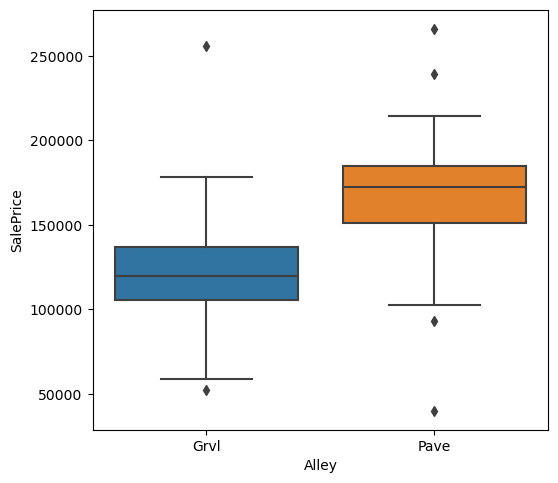

In [193]:
#Alley has significaant impact
do_box_plot(df_homeprice,'Alley','SalePrice',20,12)

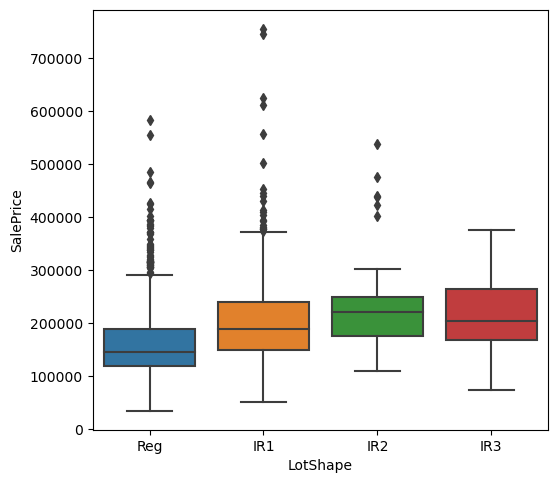

In [194]:
#LotShape has limited impact
do_box_plot(df_homeprice,'LotShape','SalePrice',20,12)

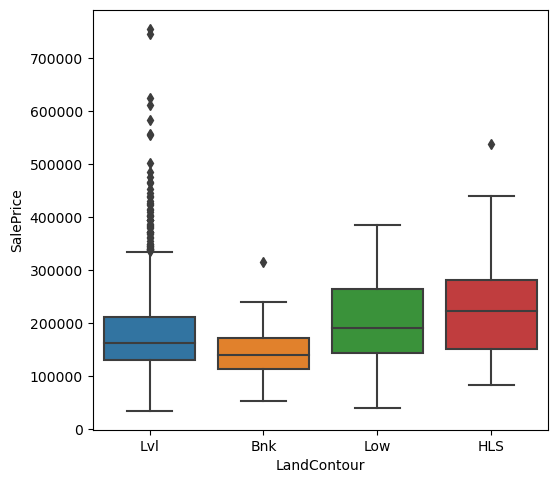

In [195]:
#LandContour has limited impact
do_box_plot(df_homeprice,'LandContour','SalePrice',20,12)

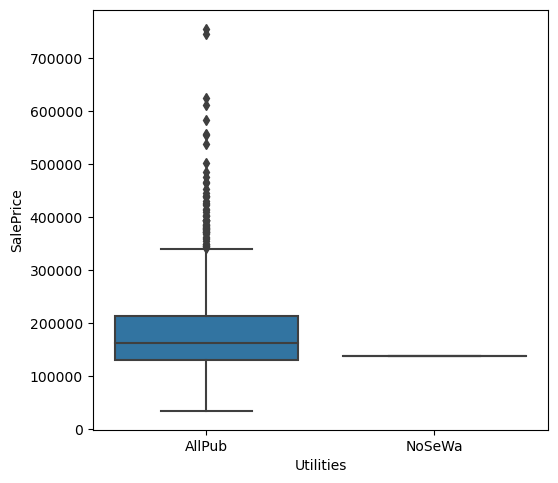

In [196]:
#Utilities has significant impact
do_box_plot(df_homeprice,'Utilities','SalePrice',20,12)

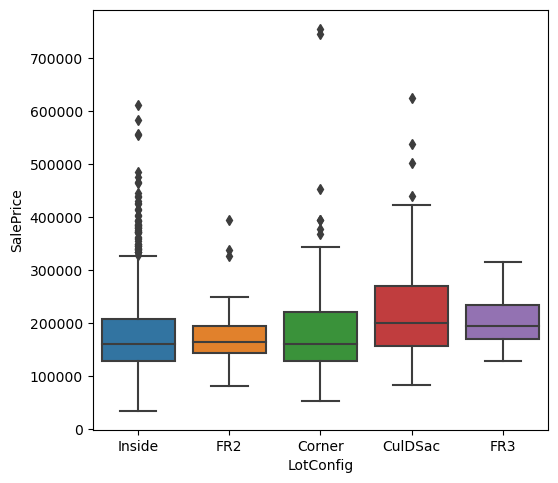

In [197]:
#LotConfig has limited impact
do_box_plot(df_homeprice,'LotConfig','SalePrice',20,12)

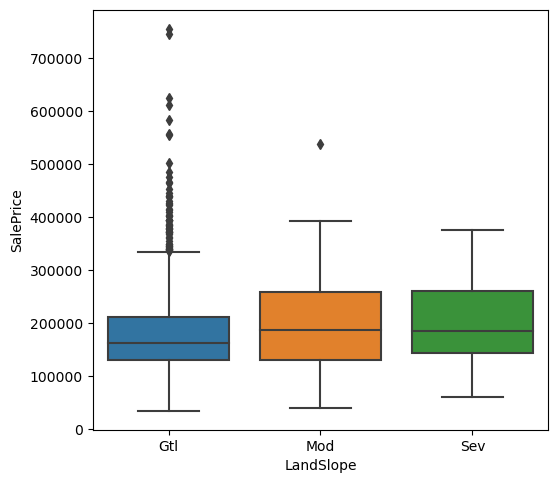

In [198]:
#LandSlope has insignificant impact
do_box_plot(df_homeprice,'LandSlope','SalePrice',20,12)

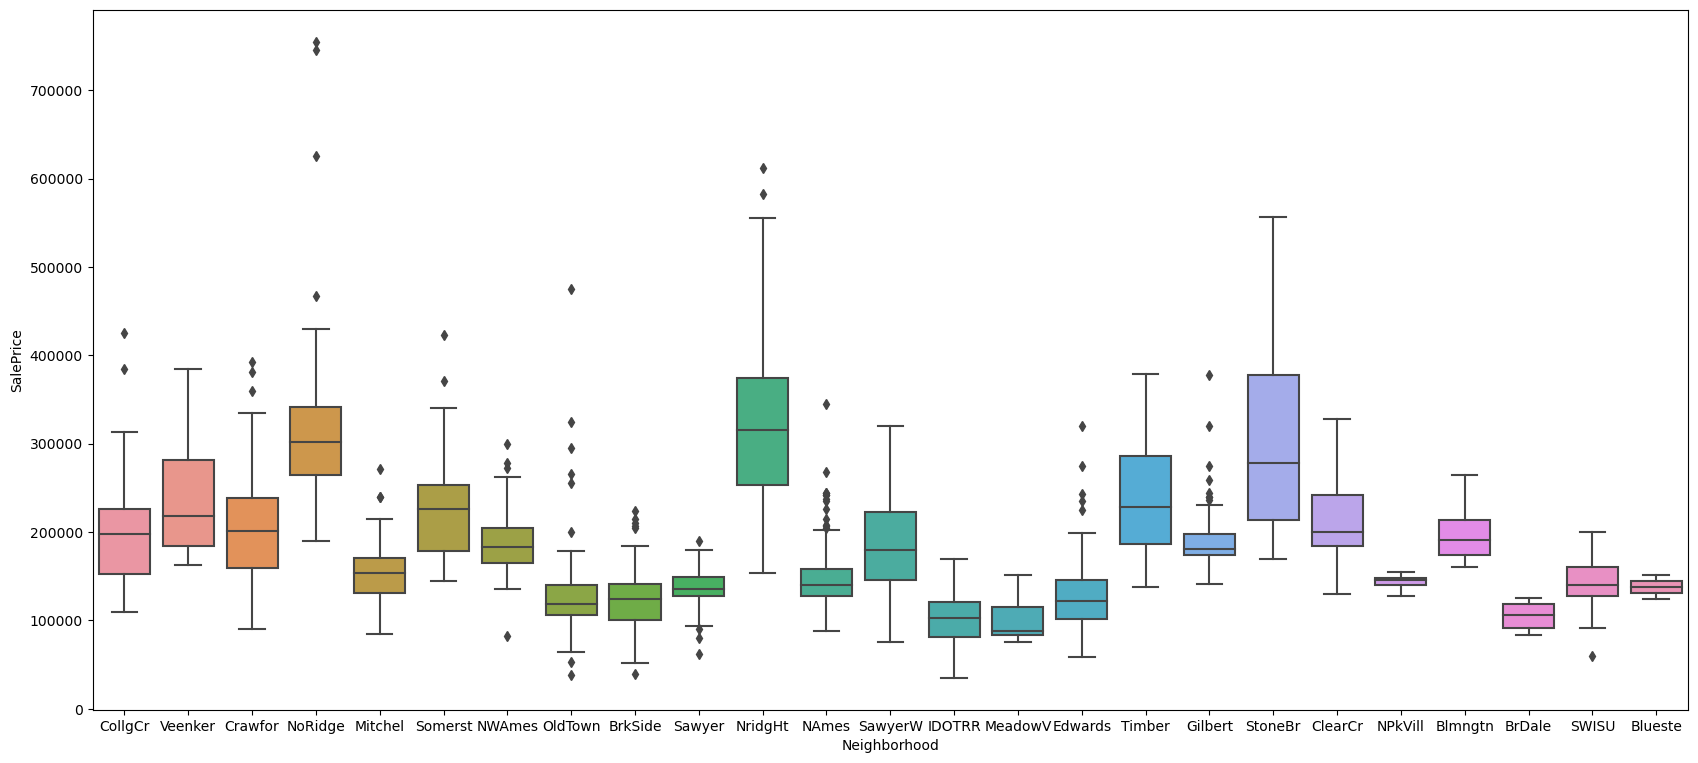

In [199]:
#Neighborhood has significant impact
do_box_plot(df_homeprice,'Neighborhood','SalePrice',70,20)

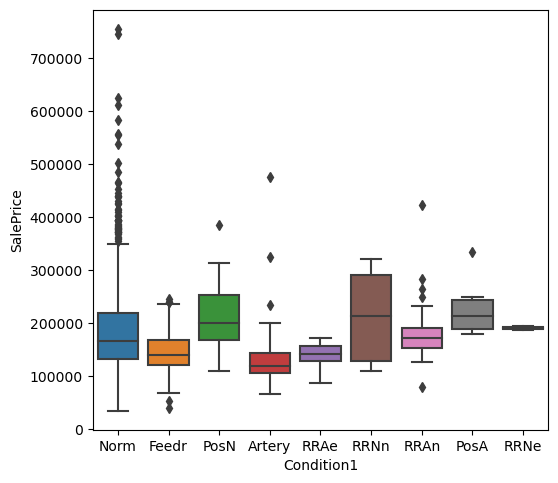

In [200]:
#Condition1 has significant impact
do_box_plot(df_homeprice,'Condition1','SalePrice',20,12)

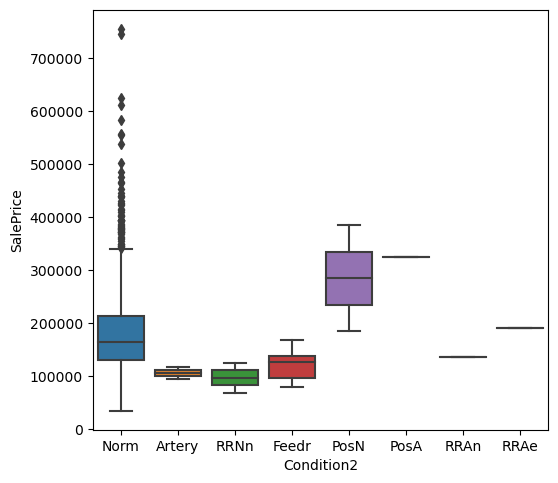

In [201]:
#Condition2 has significant impact
do_box_plot(df_homeprice,'Condition2','SalePrice',20,12)

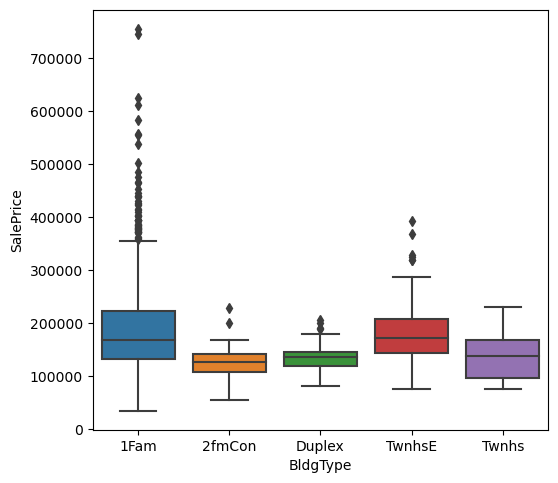

In [202]:
#BldgType has significant impact
do_box_plot(df_homeprice,'BldgType','SalePrice',20,12)

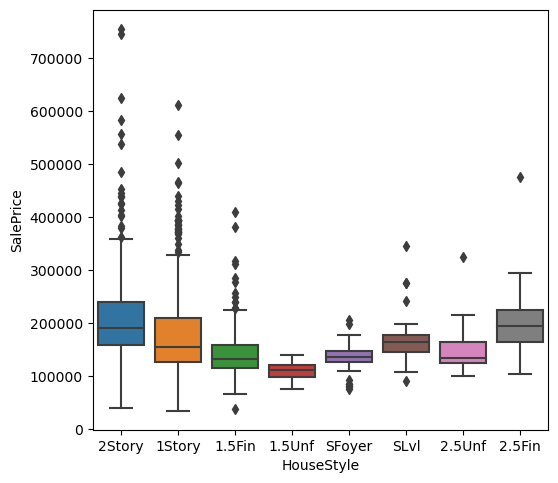

In [203]:
#HouseStyle has significant impact
do_box_plot(df_homeprice,'HouseStyle','SalePrice',20,12)

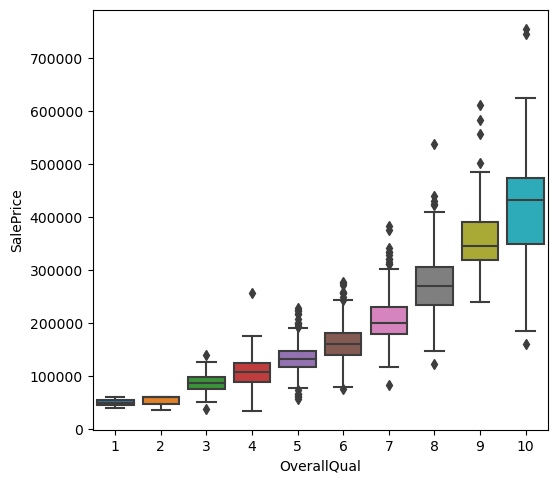

In [204]:
#HouseStyle has significant impact
do_box_plot(df_homeprice,'OverallQual','SalePrice',20,12)

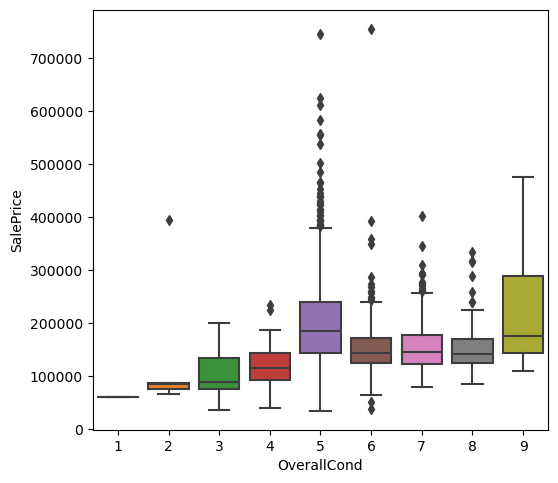

In [205]:
#HouseStyle has significant impact
do_box_plot(df_homeprice,'OverallCond','SalePrice',20,12)

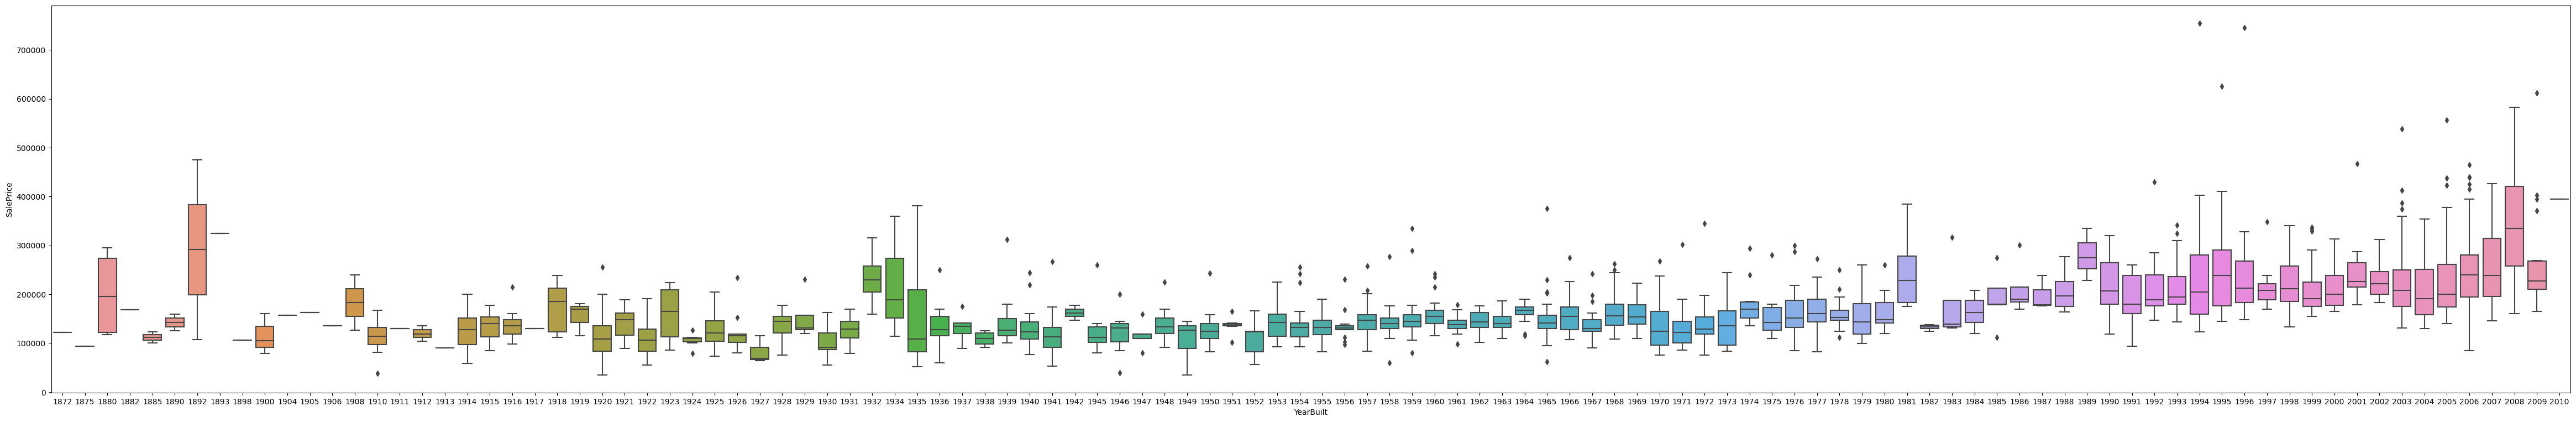

In [206]:
#YearBuilt has significant impact
do_box_plot(df_homeprice,'YearBuilt','SalePrice',200,20)

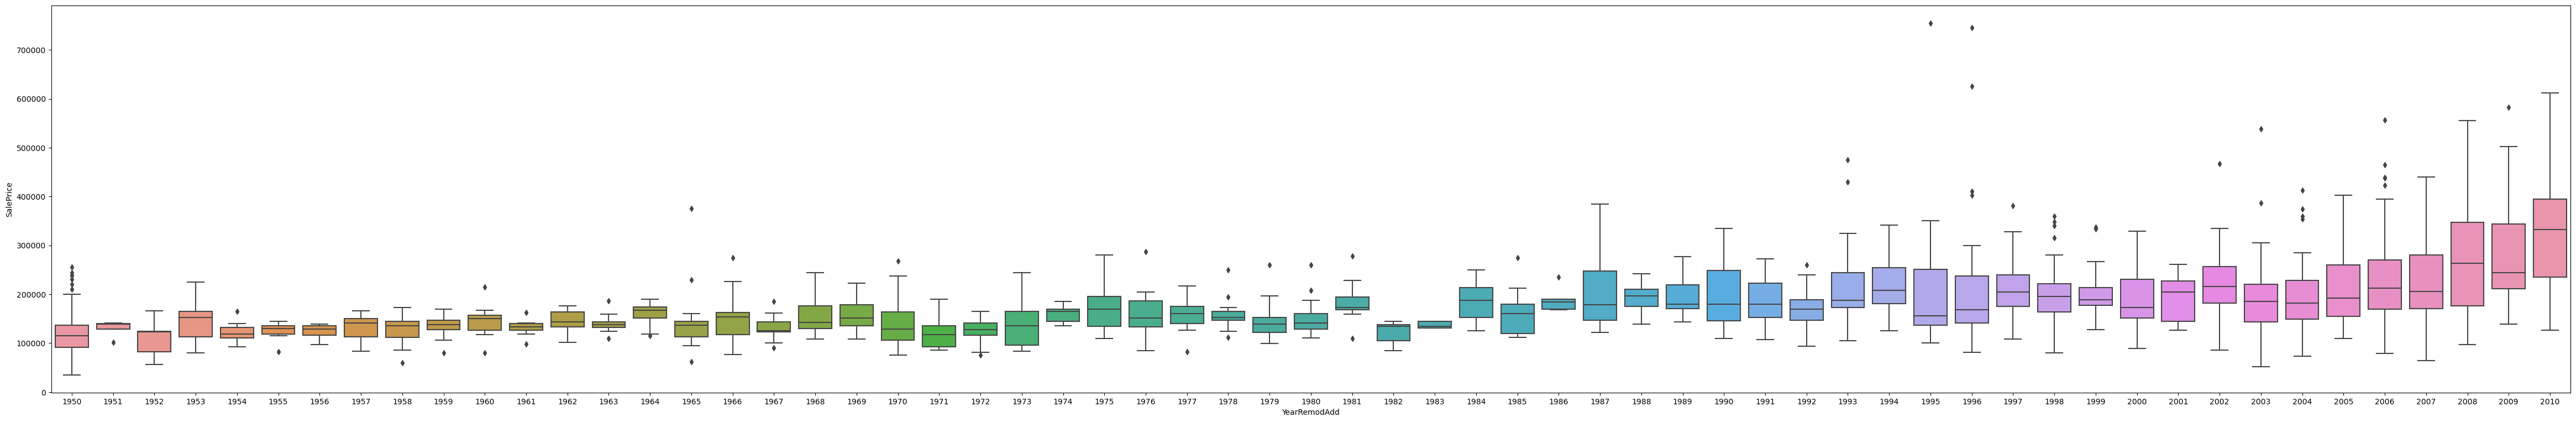

In [207]:
#YearRemodAdd has significant impact
do_box_plot(df_homeprice,'YearRemodAdd','SalePrice',200,20)

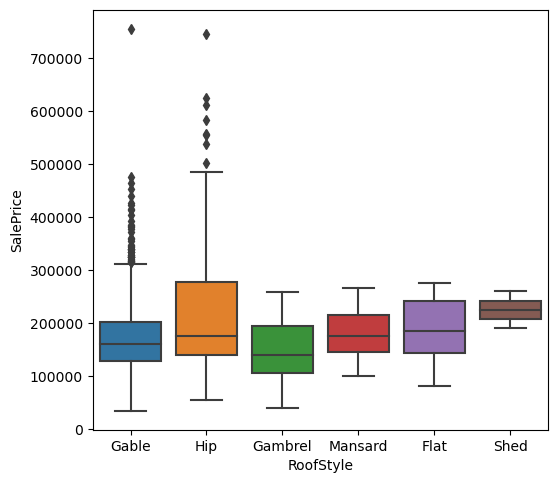

In [208]:
#RoofStyle has marginal impact
do_box_plot(df_homeprice,'RoofStyle','SalePrice',20,12)


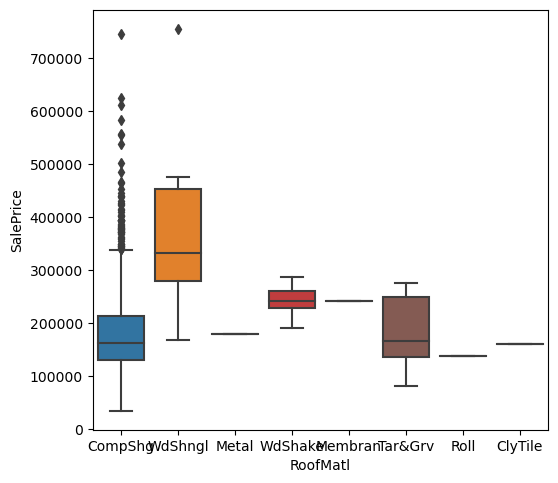

In [209]:
#RoofMatl has significant impact
do_box_plot(df_homeprice,'RoofMatl','SalePrice',20,12)


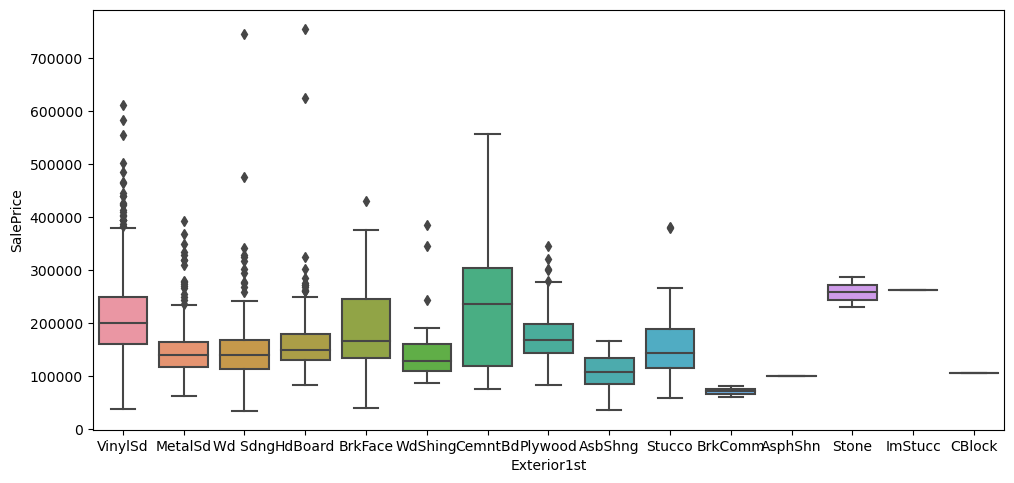

In [210]:

#Exterior1st has significant impact
do_box_plot(df_homeprice,'Exterior1st','SalePrice',40,12)



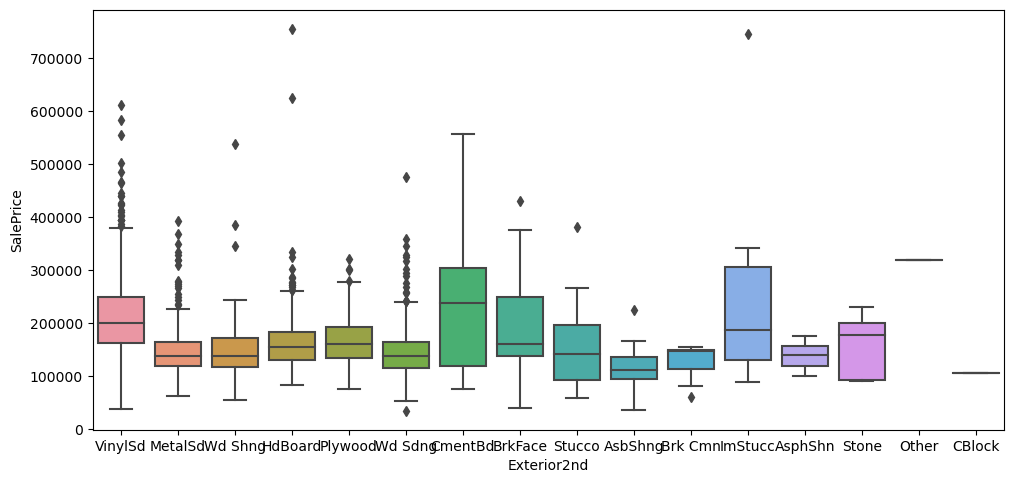

In [211]:
#Exterior2nd has significant impact
do_box_plot(df_homeprice,'Exterior2nd','SalePrice',40,12)

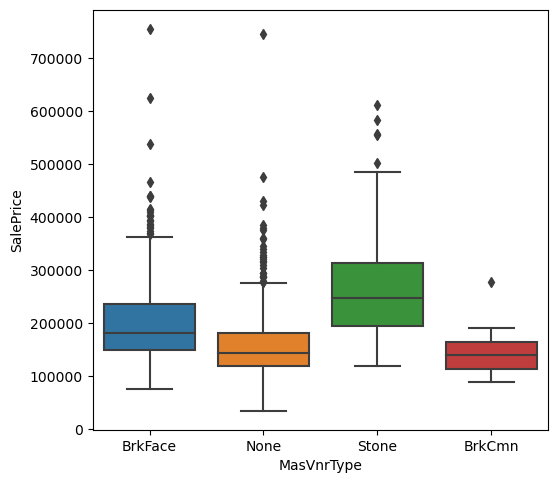

In [212]:
#MasVnrType has significant impact
do_box_plot(df_homeprice,'MasVnrType','SalePrice',20,12)

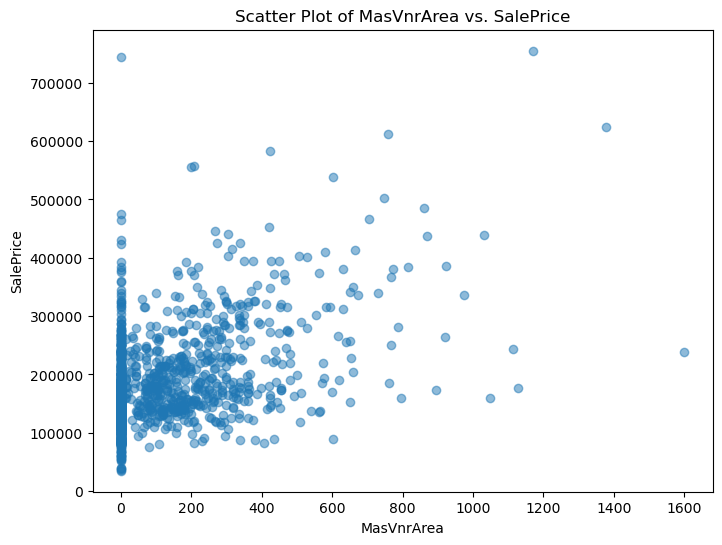

In [213]:
# MasVnrArea has significant impact
x = df_homeprice['MasVnrArea']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of MasVnrArea vs. SalePrice')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

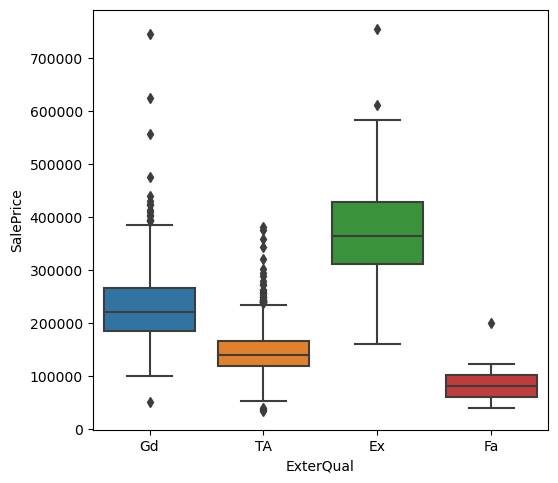

In [214]:
#ExterQual has significant impact
do_box_plot(df_homeprice,'ExterQual','SalePrice',20,12)

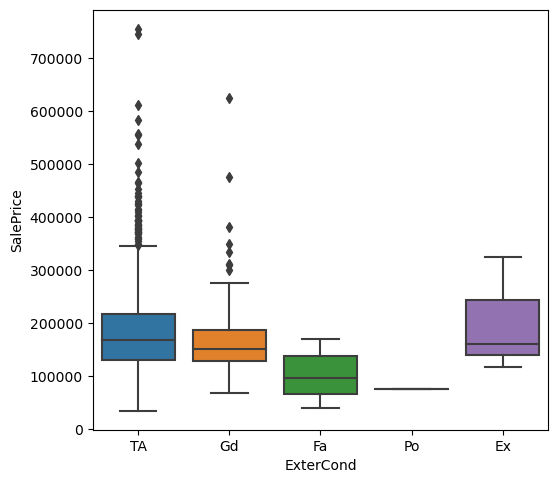

In [215]:
#ExterCond has significant impact
do_box_plot(df_homeprice,'ExterCond','SalePrice',20,12)

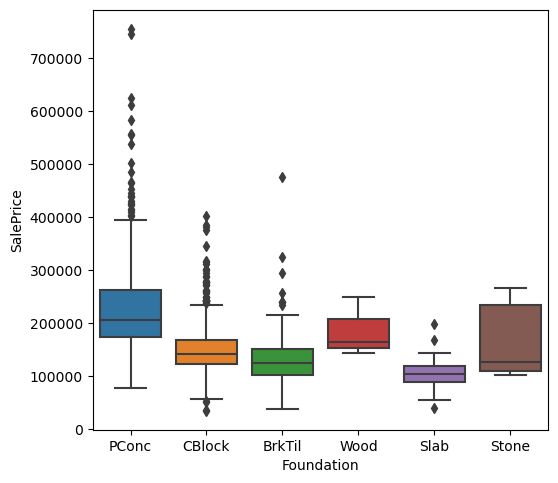

In [216]:
#Foundation has significant impact
do_box_plot(df_homeprice,'Foundation','SalePrice',20,12)

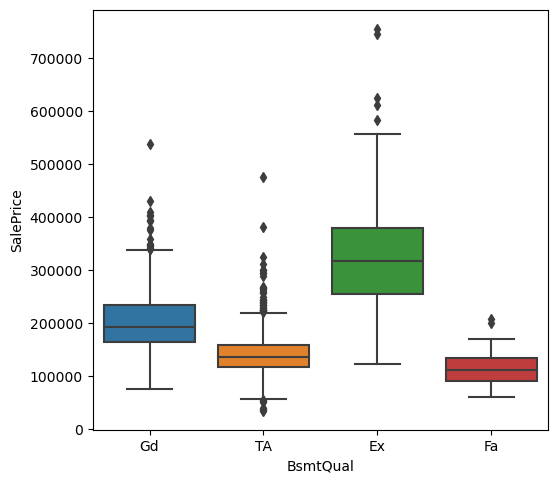

In [217]:
#BsmtQual has significant impact
do_box_plot(df_homeprice,'BsmtQual','SalePrice',20,12)

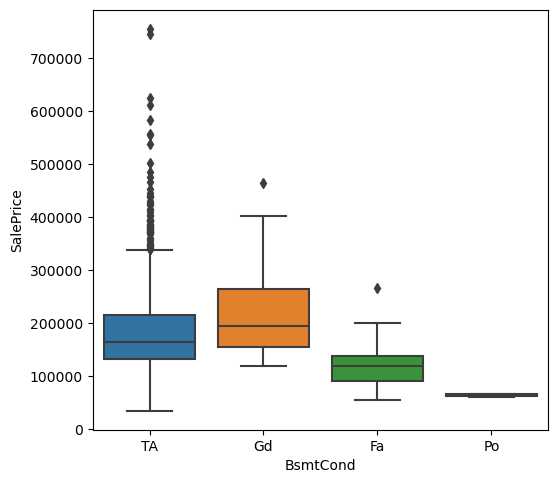

In [218]:
#BsmtCond has significant impact
do_box_plot(df_homeprice,'BsmtCond','SalePrice',20,12)

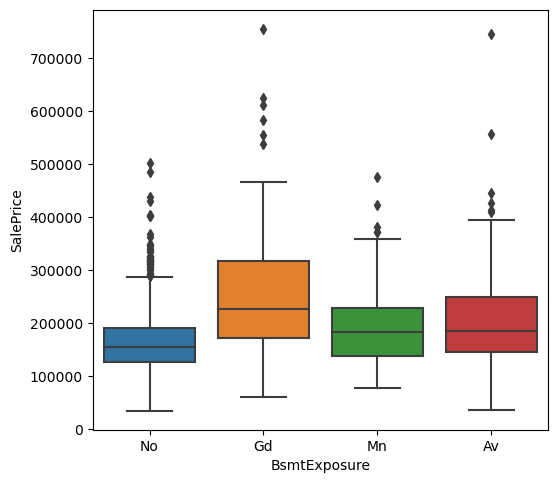

In [219]:
#BsmtExposure has significant impact
do_box_plot(df_homeprice,'BsmtExposure','SalePrice',20,12)

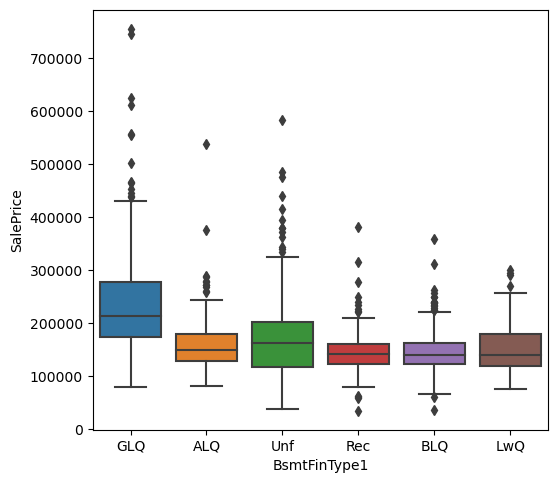

In [220]:
#BsmtFinType1 has insignificant impact
do_box_plot(df_homeprice,'BsmtFinType1','SalePrice',20,12)

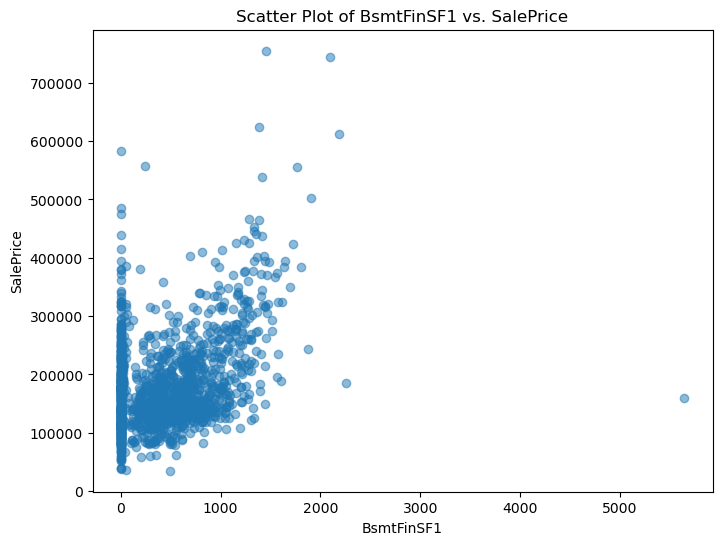

In [221]:
# BsmtFinSF1 has significant impact
x = df_homeprice['BsmtFinSF1']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of BsmtFinSF1 vs. SalePrice')
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

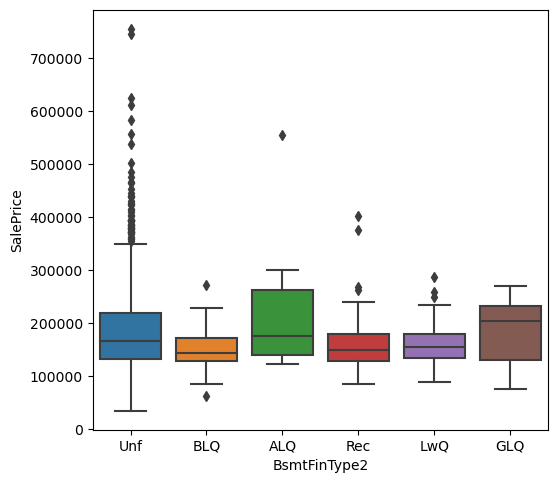

In [222]:
#BsmtFinType2 has insignificant impact
do_box_plot(df_homeprice,'BsmtFinType2','SalePrice',20,12)

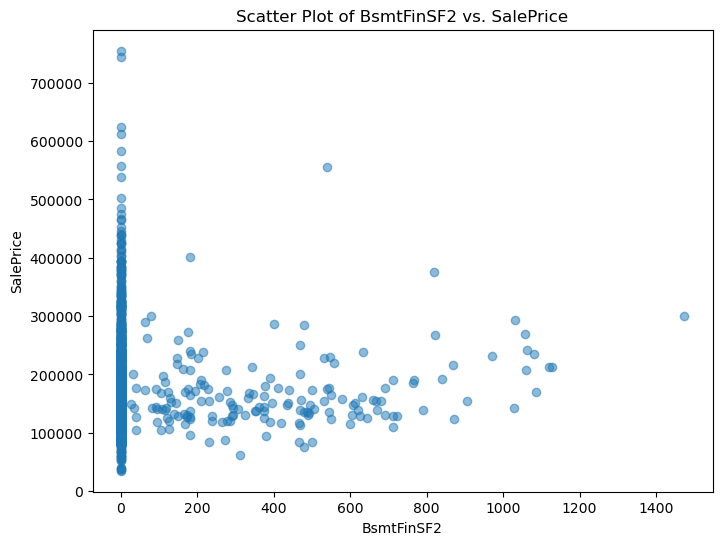

In [223]:
# BsmtFinSF2 has significant impact
# Extract the data for the scatter plot
x = df_homeprice['BsmtFinSF2']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of BsmtFinSF2 vs. SalePrice')
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

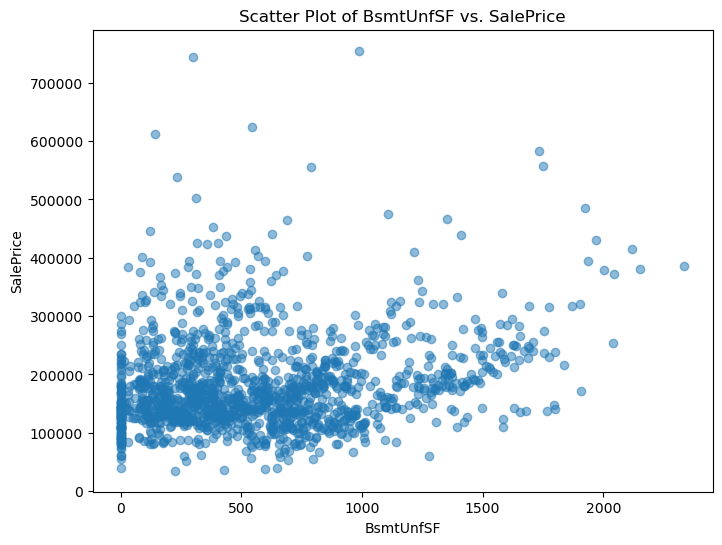

In [224]:
# BsmtFinSF has significant impact
x = df_homeprice['BsmtUnfSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of BsmtUnfSF vs. SalePrice')
plt.xlabel('BsmtUnfSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

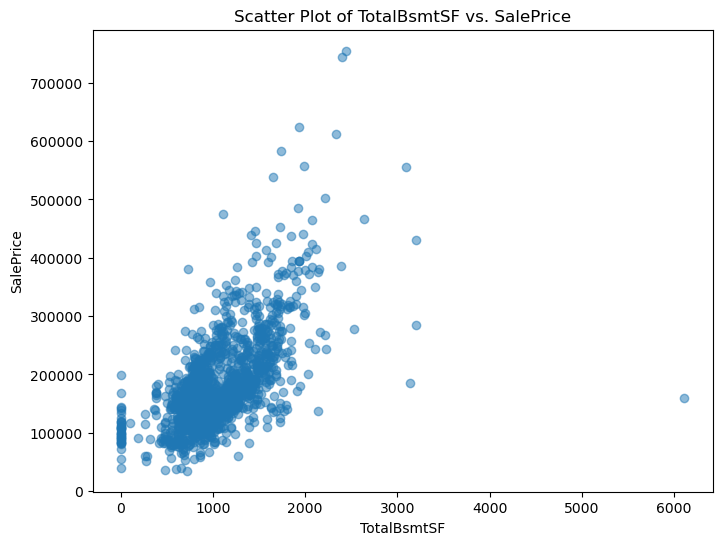

In [225]:
# TotalBsmtSF has significant impact
x = df_homeprice['TotalBsmtSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of TotalBsmtSF vs. SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

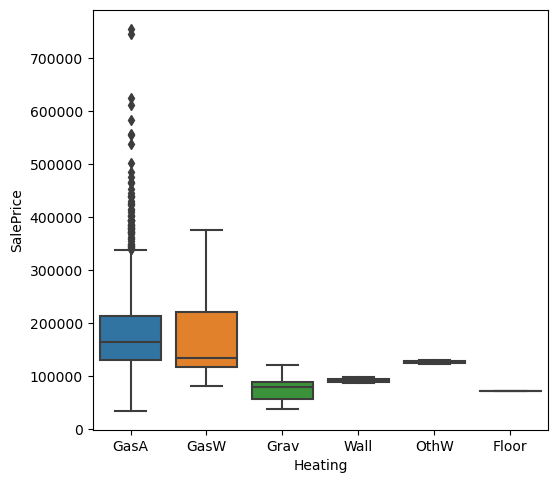

In [226]:
#Heating has significant impact
do_box_plot(df_homeprice,'Heating','SalePrice',20,12)


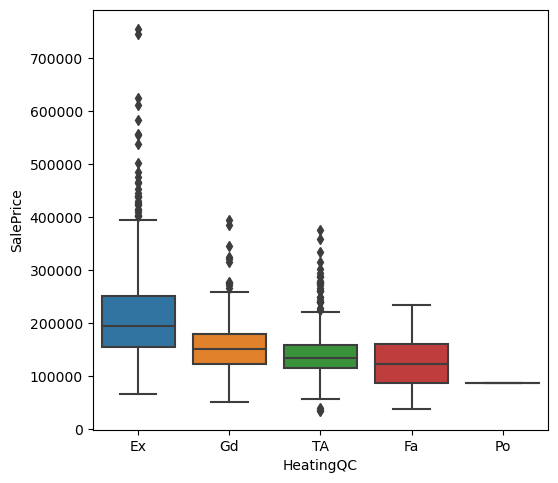

In [227]:
#HeatingQC has significant impact
do_box_plot(df_homeprice,'HeatingQC','SalePrice',20,12)

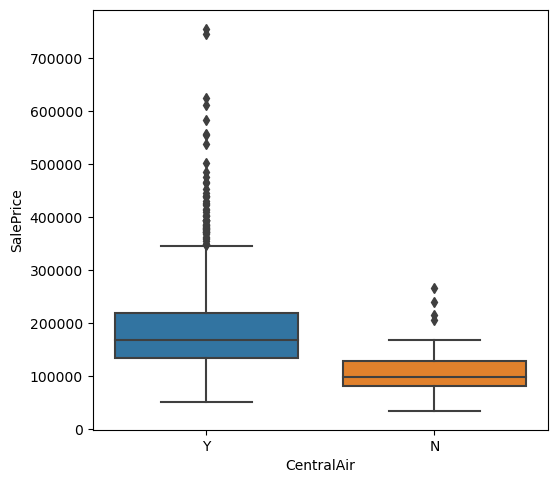

In [228]:
#CentralAir has insignificant impact
do_box_plot(df_homeprice,'CentralAir','SalePrice',20,12)

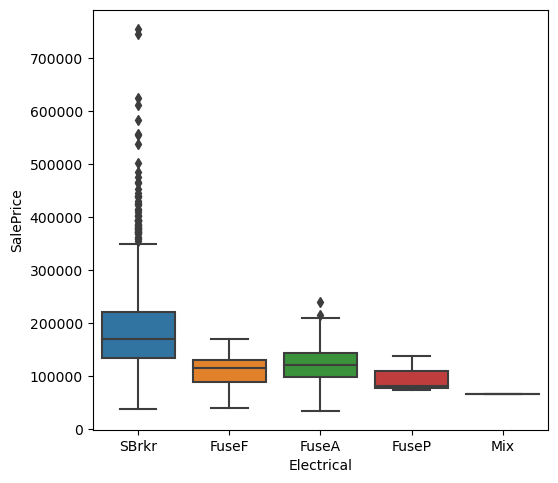

In [229]:
#CentralAir has significant impact
do_box_plot(df_homeprice,'Electrical','SalePrice',20,12)

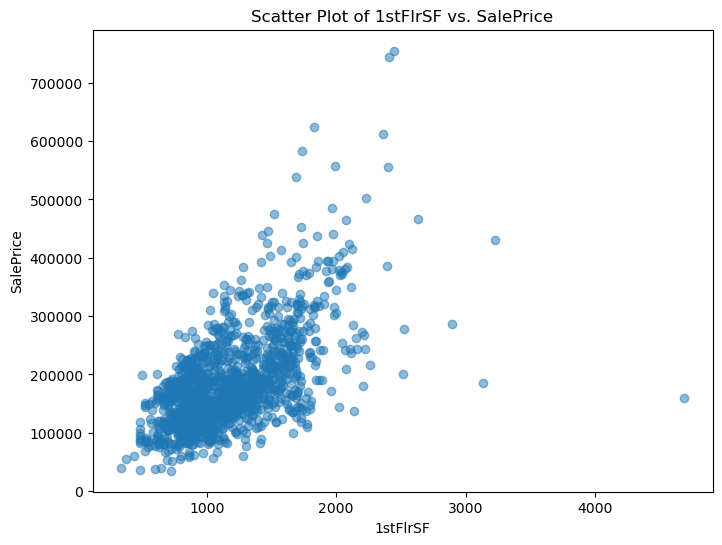

In [230]:
# 1stFlrSF has significant impact
x = df_homeprice['1stFlrSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of 1stFlrSF vs. SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

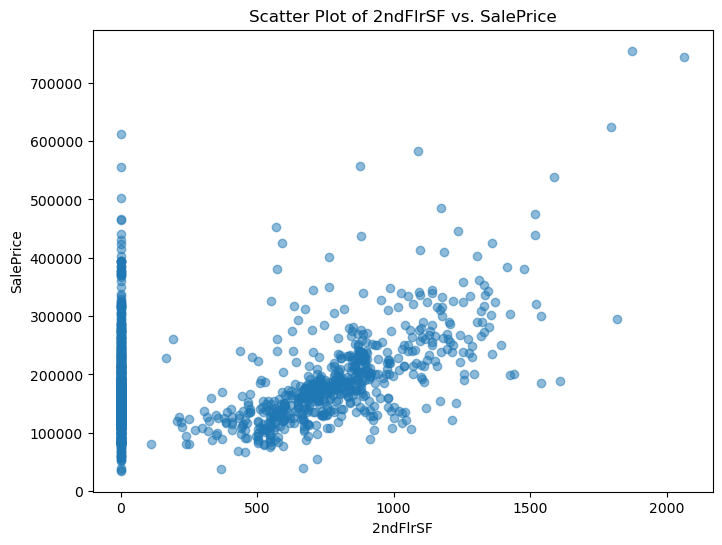

In [231]:
# 2ndFlrSF has significant impact
x = df_homeprice['2ndFlrSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of 2ndFlrSF vs. SalePrice')
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

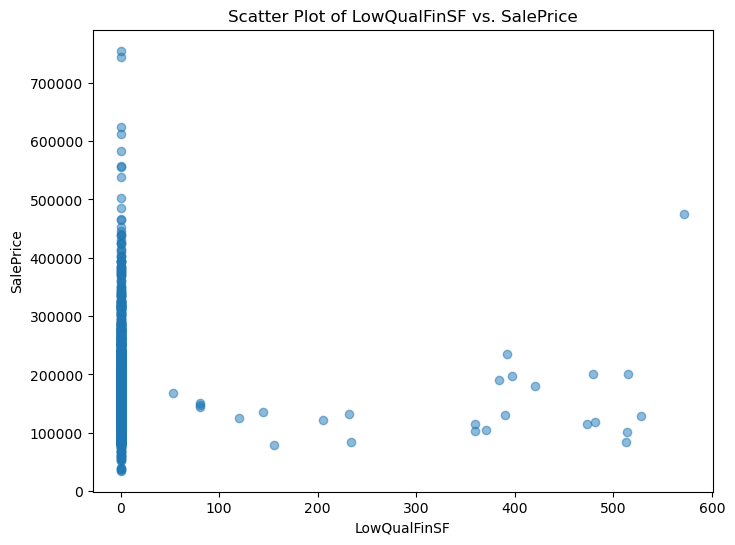

In [232]:
# 2ndFlrSF has insignificant impact
x = df_homeprice['LowQualFinSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of LowQualFinSF vs. SalePrice')
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

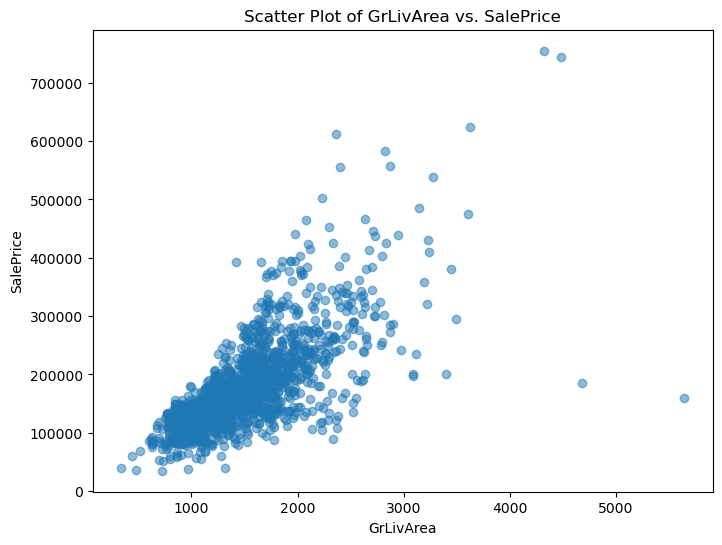

In [233]:
# GrLivArea has significant impact
x = df_homeprice['GrLivArea']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

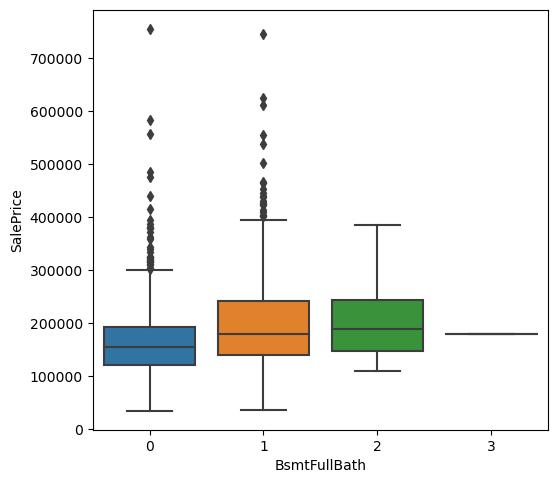

In [234]:
#BsmtFullBath has insignificant impact
do_box_plot(df_homeprice,'BsmtFullBath','SalePrice',20,12)

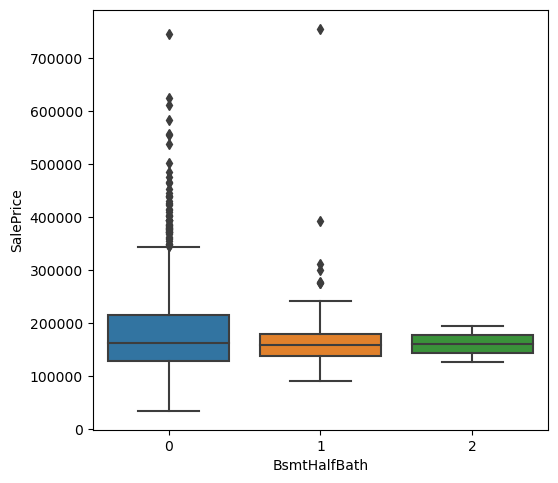

In [235]:
#BsmtHalfBath has imsignificant impact
do_box_plot(df_homeprice,'BsmtHalfBath','SalePrice',20,12)

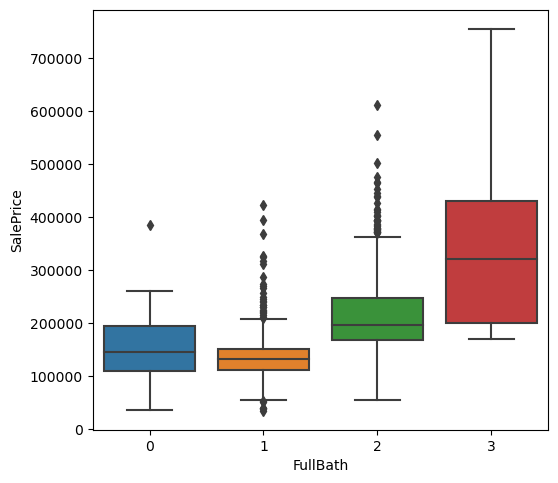

In [236]:
#FullBath has significant impact
do_box_plot(df_homeprice,'FullBath','SalePrice',20,12)

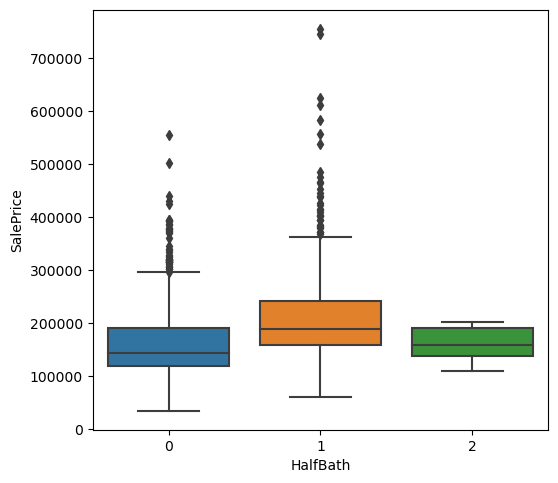

In [237]:
#HalfBath has insignificant impact
do_box_plot(df_homeprice,'HalfBath','SalePrice',20,12)

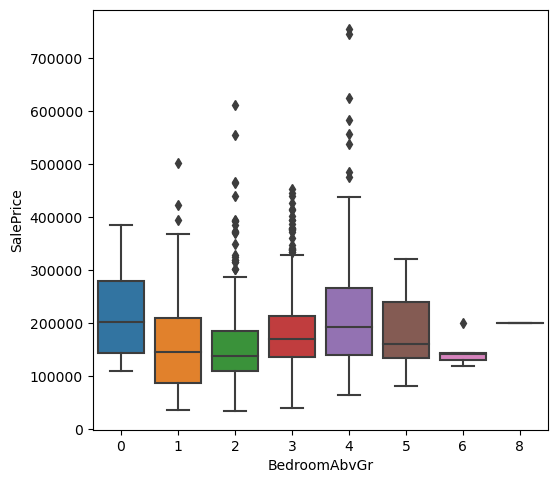

In [238]:
#BedroomAbvGr has significant impact
do_box_plot(df_homeprice,'BedroomAbvGr','SalePrice',20,12)

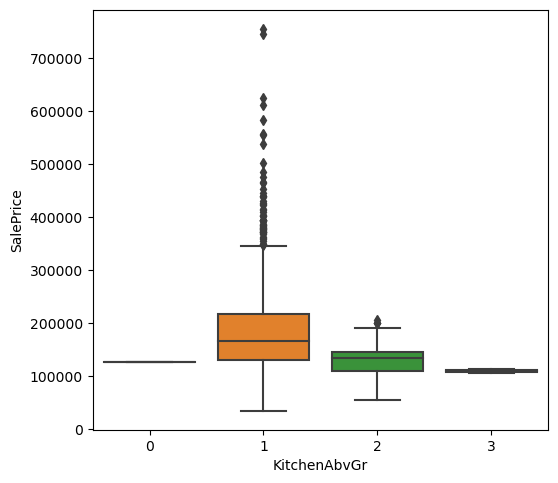

In [239]:
#KitchenAbvGr has insignificant impact
do_box_plot(df_homeprice,'KitchenAbvGr','SalePrice',20,12)

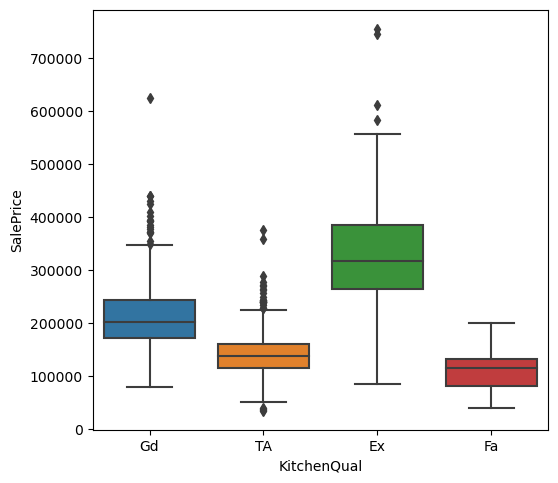

In [240]:
#KitchenQual has significant impact
do_box_plot(df_homeprice,'KitchenQual','SalePrice',20,12)

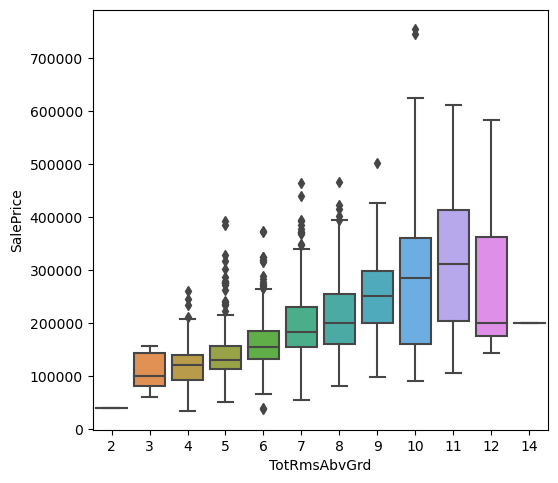

In [241]:
#TotRmsAbvGrd has significant impact
do_box_plot(df_homeprice,'TotRmsAbvGrd','SalePrice',20,12)

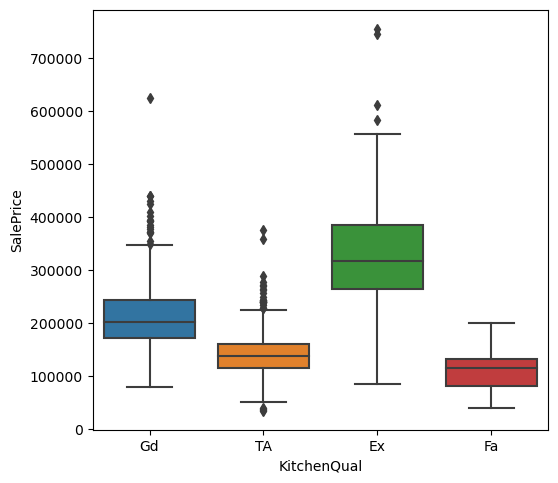

In [242]:
#KitchenQual has significant impact
do_box_plot(df_homeprice,'KitchenQual','SalePrice',20,12)

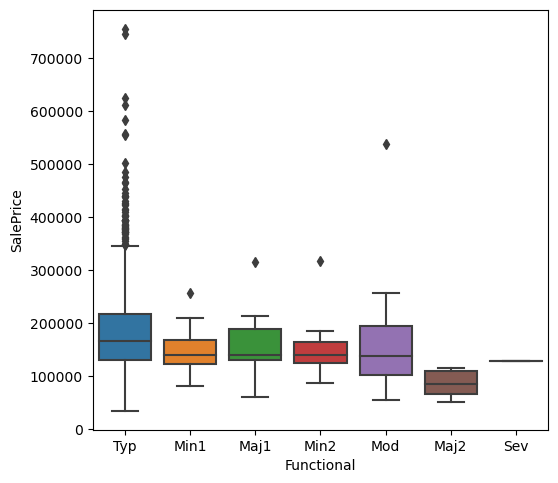

In [243]:
#Functional has significant impact
do_box_plot(df_homeprice,'Functional','SalePrice',20,12)

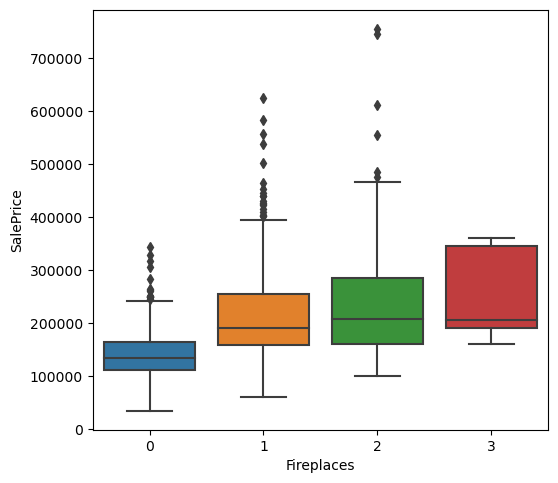

In [244]:
#Fireplaces has insignificant impact
do_box_plot(df_homeprice,'Fireplaces','SalePrice',20,12)

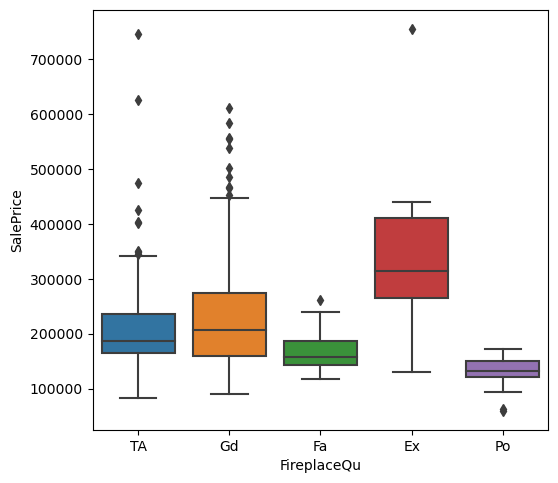

In [245]:
#FireplaceQu has significant impact
do_box_plot(df_homeprice,'FireplaceQu','SalePrice',20,12)

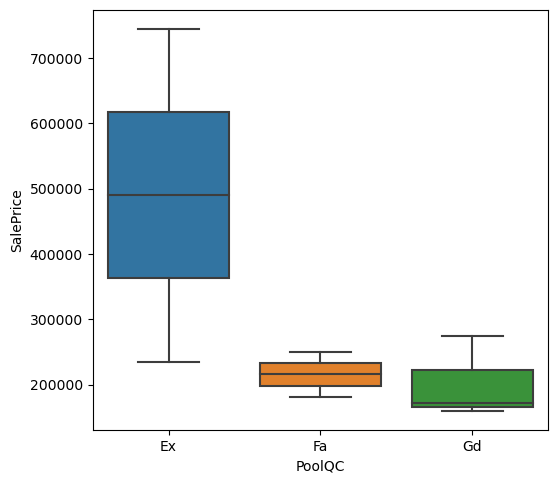

In [246]:
#PoolQC has significant impact
do_box_plot(df_homeprice,'PoolQC','SalePrice',20,12)

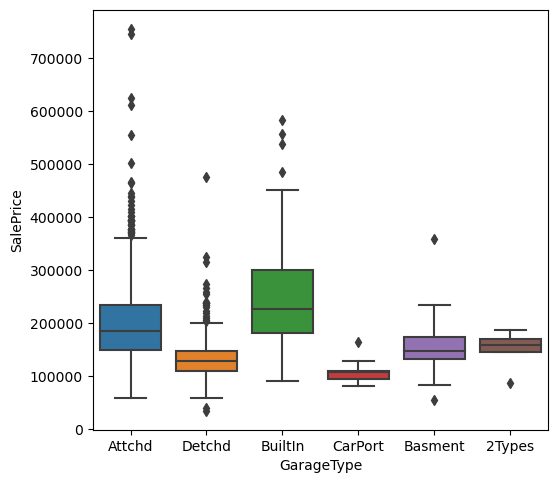

In [247]:
#GarageType has significant impact
do_box_plot(df_homeprice,'GarageType','SalePrice',20,12)

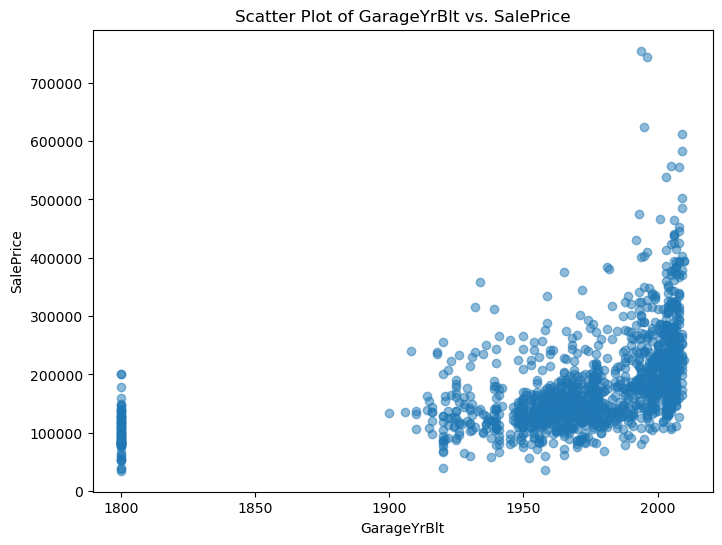

In [248]:
# Extract the data for the scatter plot
x = df_homeprice['GarageYrBlt']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of GarageYrBlt vs. SalePrice')
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

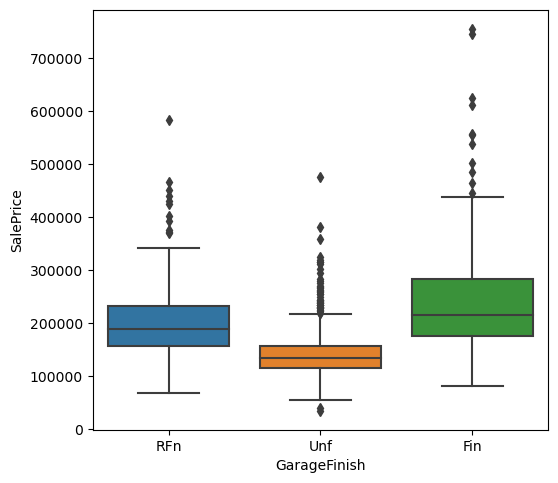

In [249]:
#GarageFinish has significant impact
do_box_plot(df_homeprice,'GarageFinish','SalePrice',20,12)

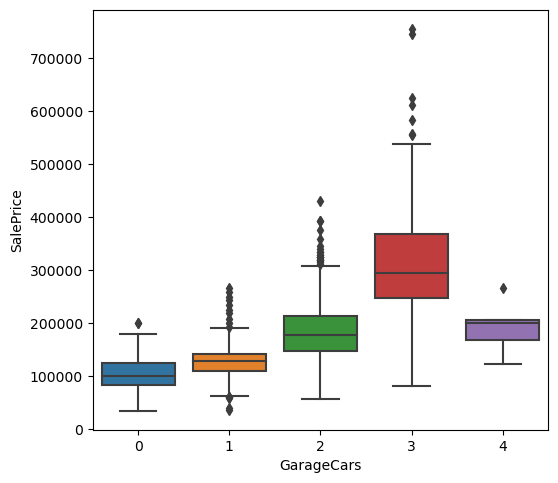

In [250]:
#GarageCars has significant impact
do_box_plot(df_homeprice,'GarageCars','SalePrice',20,12)

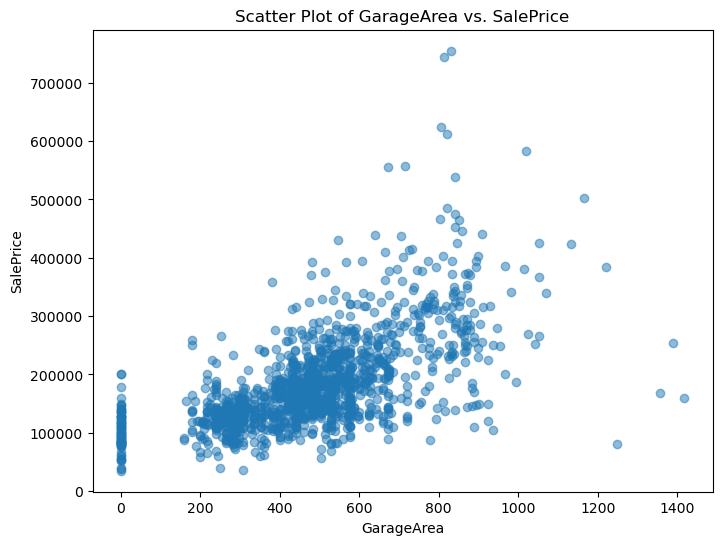

In [251]:
#GarageArea has significant impact
x = df_homeprice['GarageArea']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of GarageArea vs. SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

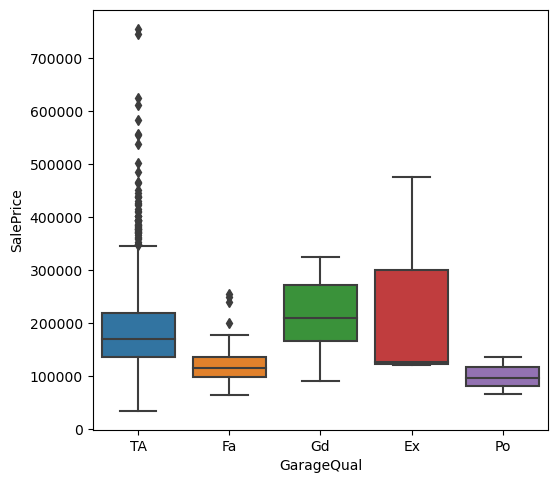

In [252]:
#GarageQual has significant impact
do_box_plot(df_homeprice,'GarageQual','SalePrice',20,12)

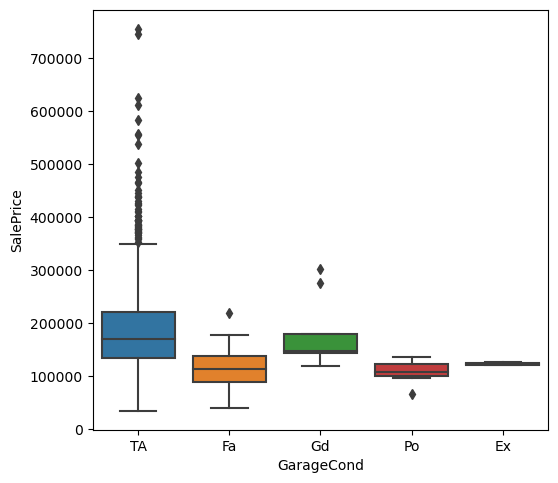

In [253]:
#GarageCond has insignificant impact
do_box_plot(df_homeprice,'GarageCond','SalePrice',20,12)

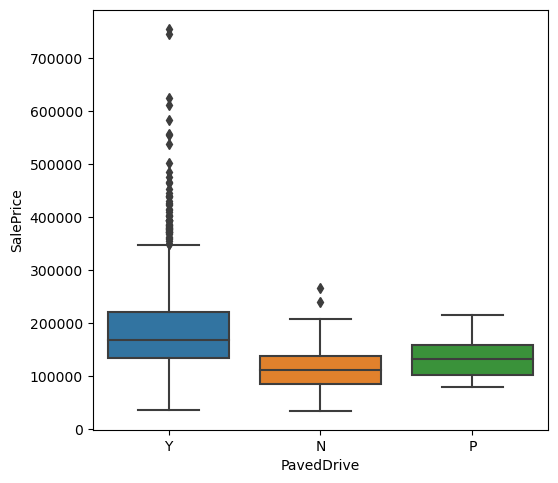

In [254]:
#PavedDrive has insignificant impact
do_box_plot(df_homeprice,'PavedDrive','SalePrice',20,12)

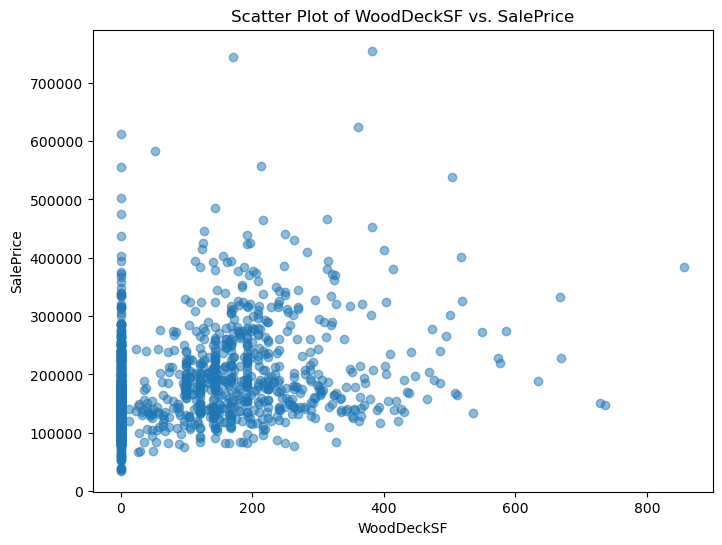

In [255]:
#WoodDeckSF has significant impact
x = df_homeprice['WoodDeckSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of WoodDeckSF vs. SalePrice')
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

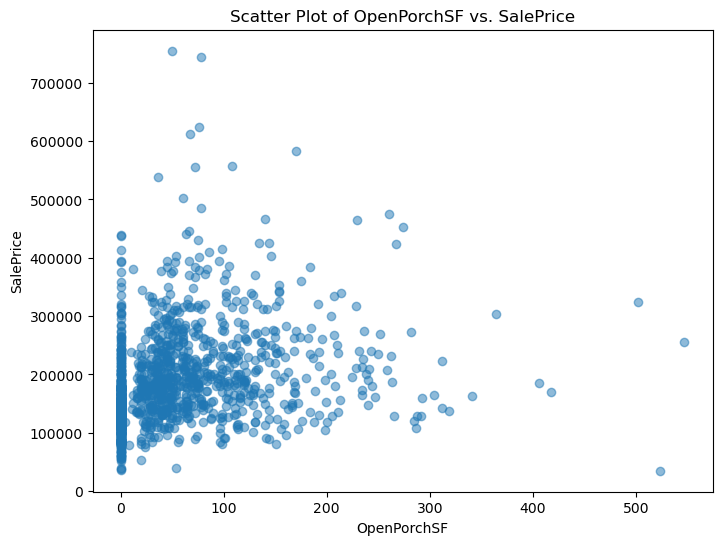

In [256]:
#OpenPorchSF has significant impact
x = df_homeprice['OpenPorchSF']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of OpenPorchSF vs. SalePrice')
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

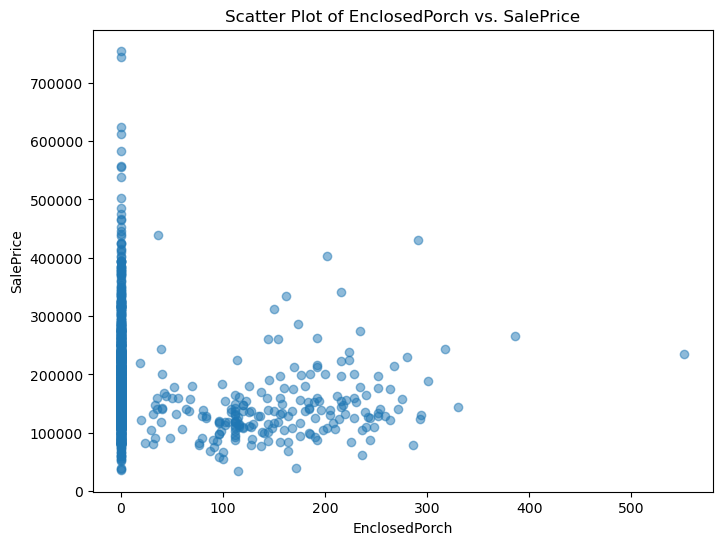

In [257]:
#EnclosedPorch has insignificant impact
x = df_homeprice['EnclosedPorch']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of EnclosedPorch vs. SalePrice')
plt.xlabel('EnclosedPorch')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

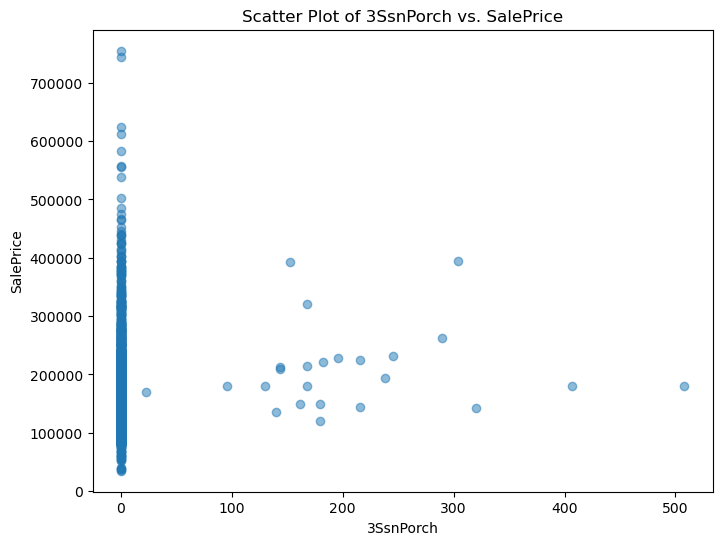

In [258]:
#3SsnPorch has insignificant impact
x = df_homeprice['3SsnPorch']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of 3SsnPorch vs. SalePrice')
plt.xlabel('3SsnPorch')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

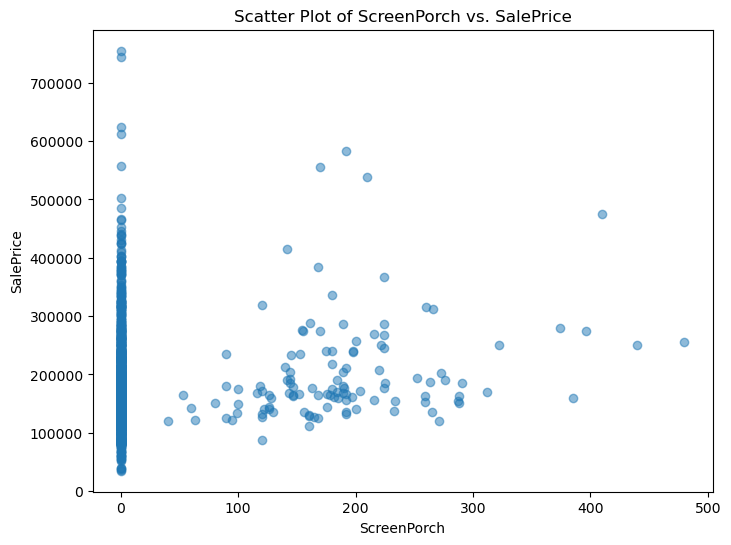

In [259]:
#ScreenPorch has significant impact
x = df_homeprice['ScreenPorch']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of ScreenPorch vs. SalePrice')
plt.xlabel('ScreenPorch')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

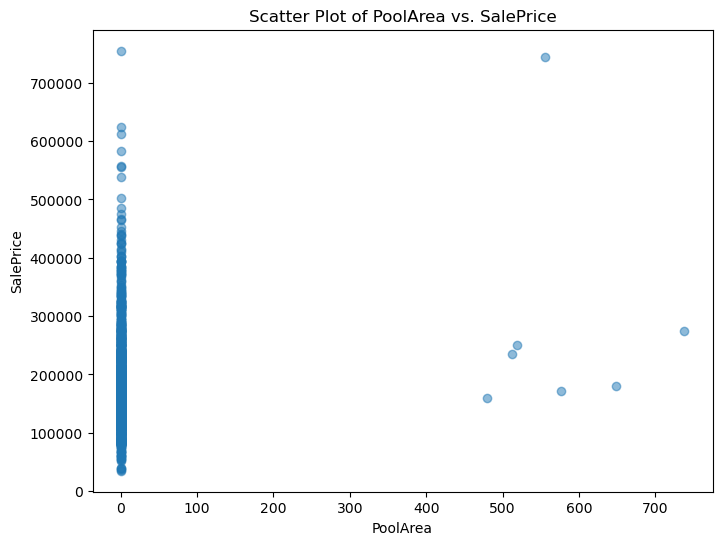

In [260]:
#PoolArea has insignificant impact
x = df_homeprice['PoolArea']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of PoolArea vs. SalePrice')
plt.xlabel('PoolArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

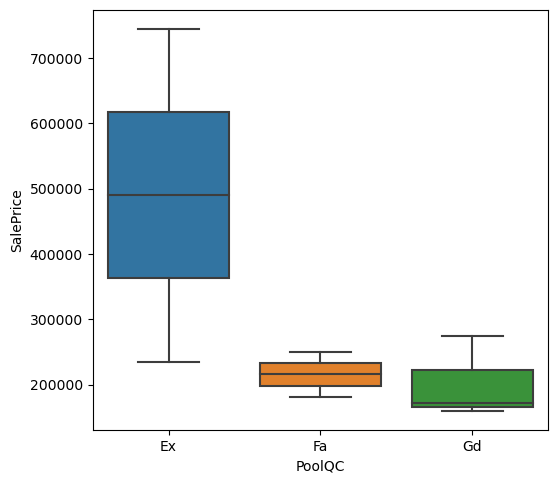

In [261]:
#PoolQC has significant impact
do_box_plot(df_homeprice,'PoolQC','SalePrice',20,12)

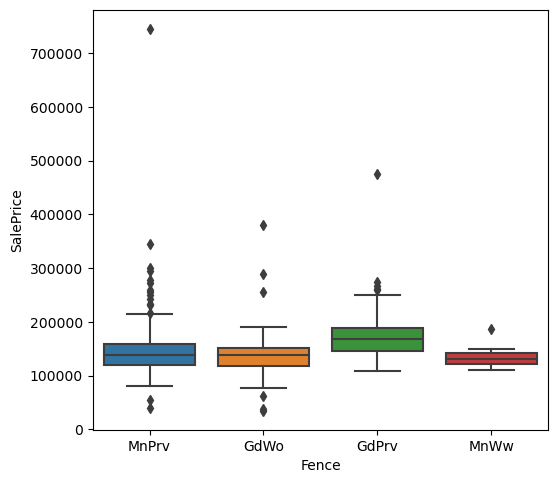

In [262]:
#Fence has insignificant impact
do_box_plot(df_homeprice,'Fence','SalePrice',20,12)

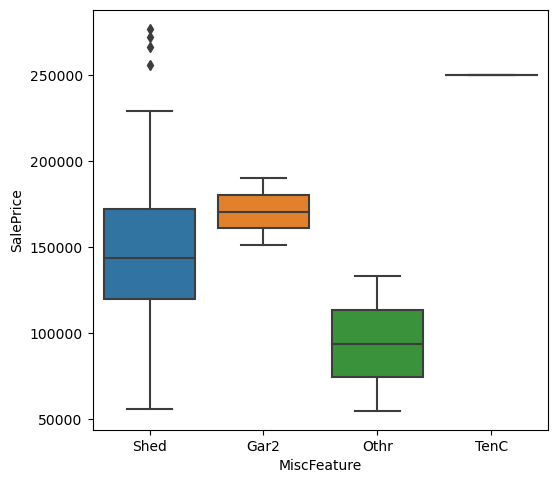

In [263]:
#MiscFeature has significant impact
do_box_plot(df_homeprice,'MiscFeature','SalePrice',20,12)

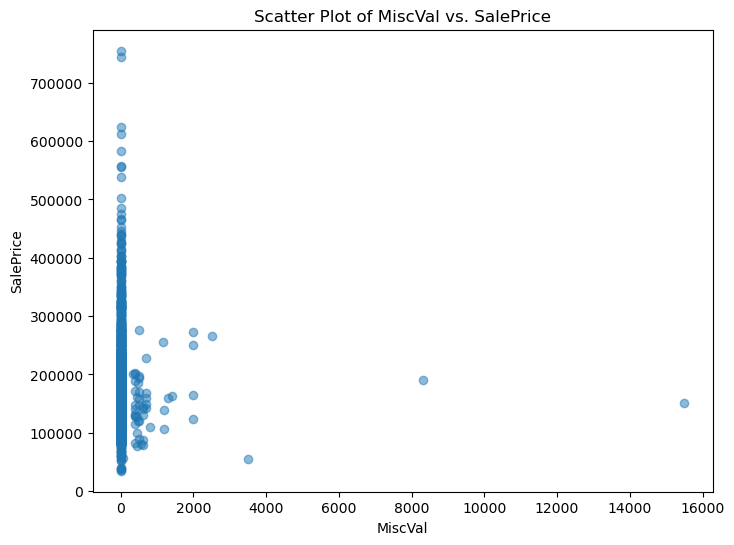

In [264]:
#MiscVal has insignificant impact
x = df_homeprice['MiscVal']
y = df_homeprice['SalePrice']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # 'alpha' controls the transparency of points
plt.title('Scatter Plot of MiscVal vs. SalePrice')
plt.xlabel('MiscVal')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

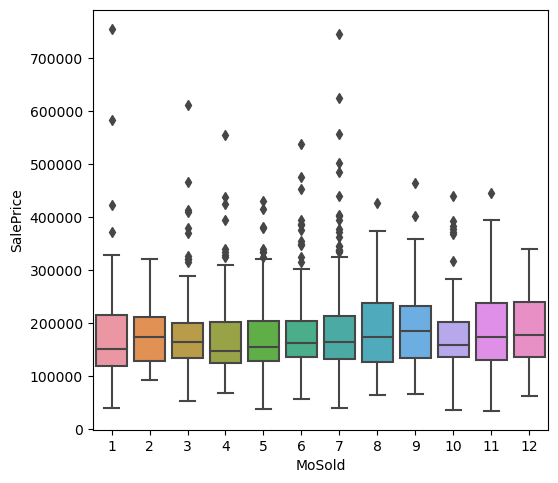

In [265]:
#MoSold has insignificant impact
do_box_plot(df_homeprice,'MoSold','SalePrice',20,12)

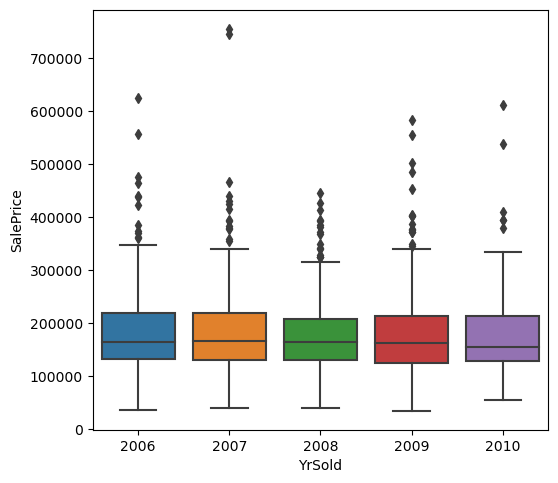

In [266]:
#YrSold has insignificant impact
do_box_plot(df_homeprice,'YrSold','SalePrice',20,12)

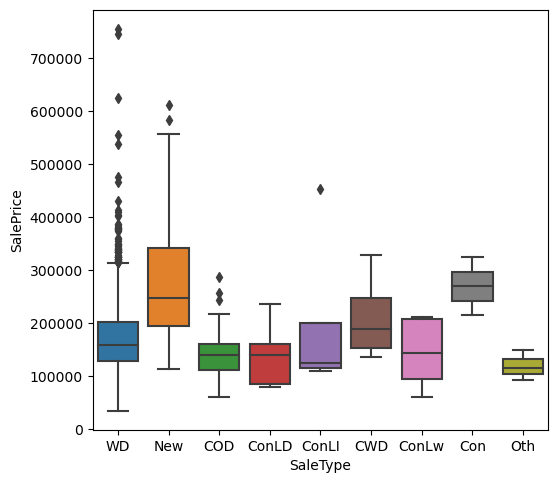

In [267]:
#SaleType has significant impact
do_box_plot(df_homeprice,'SaleType','SalePrice',20,12)

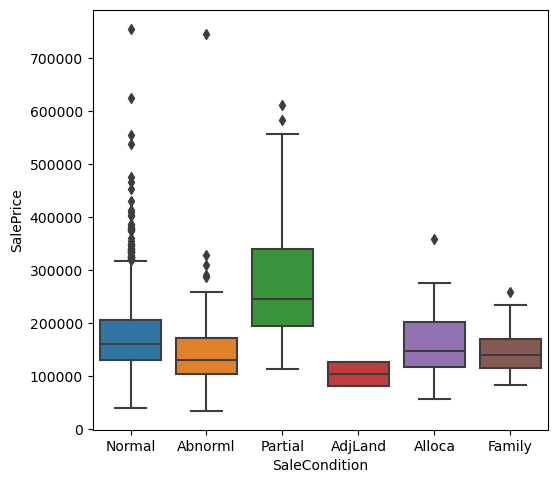

In [268]:
#SaleCondition has significant impact
do_box_plot(df_homeprice,'SaleCondition','SalePrice',20,12)